In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('./data./train.csv')
df.head()

일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  일사합  일조율  평균기온
0  1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7  NaN  NaN  -1.6
1  1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0  NaN  NaN  -1.9
2  1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0  NaN  NaN   4.0
3  1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6  NaN  NaN   7.5
4  1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2  NaN  NaN  -4.6

In [3]:
df.describe()

최고기온          최저기온           일교차          강수량          평균습도  \
count  23008.000000  23008.000000  23007.000000  9150.000000  23011.000000   
mean      17.071714      8.451960      8.619277     9.593683     65.202851   
std       10.714471     10.578285      2.907096    21.966135     14.549077   
min      -13.600000    -20.200000      1.000000     0.000000     17.900000   
25%        7.800000     -0.300000      6.600000     0.100000     54.900000   
50%       18.900000      9.200000      8.600000     1.400000     65.500000   
75%       26.400000     17.900000     10.600000     8.500000     75.800000   
max       39.600000     30.300000     19.600000   332.800000     99.800000   

               평균풍속           일조합           일사합           일조율          평균기온  
count  23007.000000  22893.000000  18149.000000  22645.000000  23011.000000  
mean       2.380993      5.858826     11.933170     48.653526     12.415419  
std        0.947595      3.816941      6.419122     31.662321     10.489515  
min        0.100000      0.000000      0.000000      0.000000    -16.400000  
25%        1.700000      2.200000      7.000000     17.800000      3.400000  
50%        2.200000      6.600000     11.220000     55.700000     13.800000  
75%        2.900000      9.000000     16.620000     78.000000     21.800000  
max        7.800000     13.700000     33.480000     96.900000     33.700000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [5]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Users\\navyb\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf',
 'C:\\Windows\\Fonts\\MaruBuri-Regular.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\PLAYBILL.TTF',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\BOD_BI.TTF',
 'C:\\Windows\\Fonts\\OLDENGL.TTF',
 'C:\\Windows\\Fonts\\FTLTLT.TTF',
 'C:\\Windows\\Fonts\\arial.ttf',
 'C:\\Windows\\Fonts\\LeelawUI.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\FRSCRIPT.TTF',
 'C:\\Windows\\Fonts\\WINGDNG2.TTF',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\GOUDOSI.TTF',
 'C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\NanumBarunpenR.ttf',
 'C:\\Windows\\Fonts\\FRABK.TTF',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\GOTHICBI.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C

In [3]:
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\NanumSquareR.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


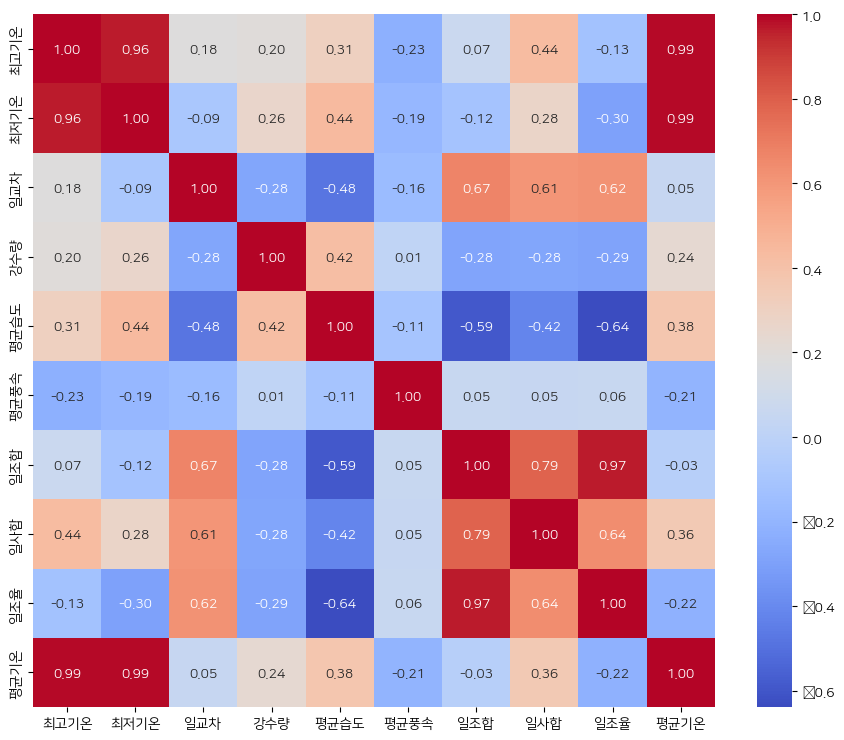

In [7]:
columns = df[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율', '평균기온']]
plt.figure(figsize=(11, 9))
sns.heatmap(columns.corr(), annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

## eda
- 최고, 최저, 평균 기온의 관련성은 역시 높다
- 일교차, 일조율, 일조합도 서로 비례하는 것으로 보인다.
- 강수량과 평균습도는 비례
- 일조율/일조합과 평균습도는 반비례한다.

In [6]:
df

일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온
0      1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7    NaN   NaN  -1.6
1      1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0    NaN   NaN  -1.9
2      1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0    NaN   NaN   4.0
3      1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6    NaN   NaN   7.5
4      1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2    NaN   NaN  -4.6
...           ...   ...   ...   ...  ...   ...   ...  ...    ...   ...   ...
23006  2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  10.25  91.7  -2.6
23007  2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  10.86  90.6  -3.3
23008  2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  10.88  93.8  -2.9
23009  2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  10.84  82.3  -1.8
23010  2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1   4.16  11.5  -1.2

[23011 rows x 11 columns]

In [7]:
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [9]:
# fillna를 무엇으로 해야할까

In [3]:
df['일시'] = pd.to_datetime(df['일시'], format= '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


In [4]:
df['year'] = df['일시'].dt.year

C:\Users\navyb\AppData\Local\Temp\ipykernel_19032\795068451.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


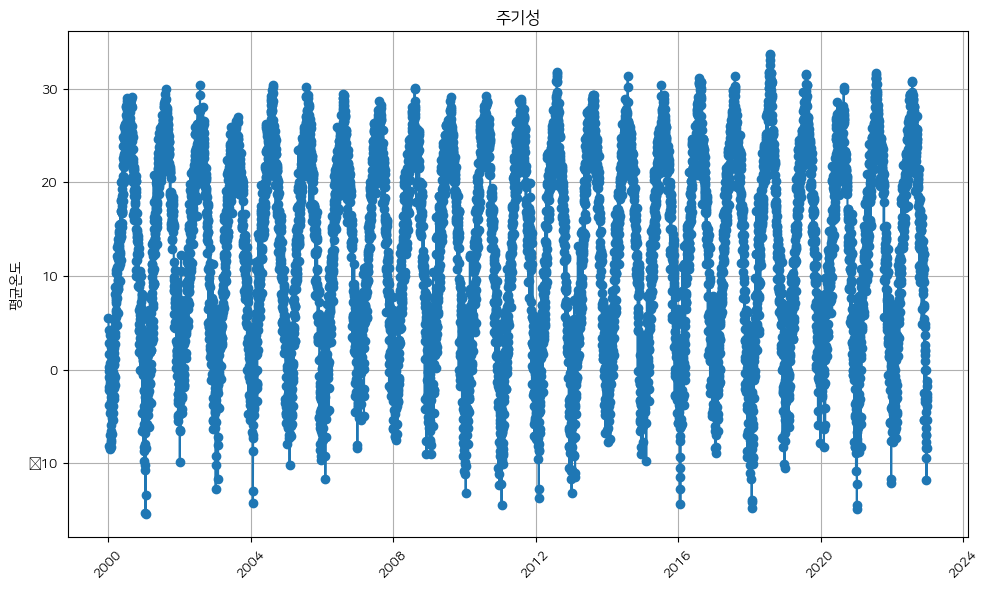

In [17]:
# 평균 온도 주기성 살펴보기
dates = df['일시']
average_temp = df['평균기온']
dates_2000_2022 = df[(df['year'] >= 2000) & (df['year'] <= 2022)]
plt.figure(figsize=(10, 6))
plt.plot(dates_2000_2022['일시'], dates_2000_2022['평균기온'], marker='o', linestyle='-')
plt.title('주기성')
plt.ylabel('평균온도')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
df1 = df.loc[:, ['일시', '평균기온']]
df1.index = df1['일시']
df1 = df1.drop(columns= '일시')
df1

평균기온
일시              
1960-01-01  -1.6
1960-01-02  -1.9
1960-01-03   4.0
1960-01-04   7.5
1960-01-05  -4.6
...          ...
2022-12-27  -2.6
2022-12-28  -3.3
2022-12-29  -2.9
2022-12-30  -1.8
2022-12-31  -1.2

[23011 rows x 1 columns]

In [12]:
pip install statsmodels

                                              0.0/9.9 MB ? eta -:--:--
     -                                        0.5/9.9 MB 10.0 MB/s eta 0:00:01
     -----                                    1.4/9.9 MB 14.8 MB/s eta 0:00:01
     ----------                               2.6/9.9 MB 18.4 MB/s eta 0:00:01
     ----------------                         4.0/9.9 MB 21.4 MB/s eta 0:00:01
     ---------------------                    5.2/9.9 MB 23.9 MB/s eta 0:00:01
     ---------------------------              6.9/9.9 MB 25.7 MB/s eta 0:00:01
     ----------------------------------       8.6/9.9 MB 27.3 MB/s eta 0:00:01
     ---------------------------------------  9.9/9.9 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 9.9/9.9 MB 27.4 MB/s eta 0:00:00
                                              0.0/233.9 kB ? eta -:--:--
     ------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\navyb\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [6]:
from statsmodels.tsa.stattools import adfuller
adfuller(df1, autolag='AIC')

(-16.61918613006999,
 1.7040000780817657e-29,
 47,
 22963,
 {'1%': -3.4306348073488953,
  '5%': -2.861665875733115,
  '10%': -2.5668370000577982},
 100818.50015374788)

In [14]:
# ADF 결과 중 통계량, p-value, 기각역을 계산하고 출력하는 함수 정의 및 실행
def ADF_test(data):
    # ADF 실시
    results = adfuller(data, autolag='AIC')

    # 통계량
    s = results[0]
    # p-value
    p = results[1]
    # 기각역
    cv = results[4]

    # 출력
    print('-'*30)
    print('Augmented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)

In [15]:
ADF_test(df1)

------------------------------
Augmented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4306348073488953, '5%': -2.861665875733115, '10%': -2.5668370000577982}
------------------------------
Test Statistics : -16.6192
p-value : 0.0000
------------------------------


### p-value가 0.05보다 작으므로 정상 시계열이다

C:\Users\navyb\AppData\Local\Temp\ipykernel_2052\4287888381.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


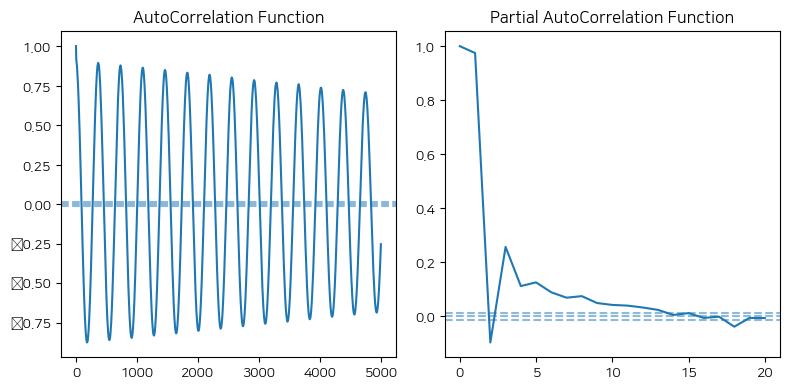

In [25]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

# ACF
acf_5000 = acf(x=df1, nlags=5000)
# PACF
pacf_20 = pacf(x=df1, nlags=20, method='ols')

# 95% 신뢰구간 계산하기
confidence = 1.96/np.sqrt(len(df1))

# 시각화
plt.figure(figsize=(8, 4))
# ACF
plt.subplot(1, 2, 1)
plt.plot(acf_5000)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

### AutoCorrelation Function이 이상치를 보이고 있으므로 ARIMA보다 계절성을 가지는 SARIMA가 적합해 보인다.


In [42]:
# SARIMA 모델의 최적 하이퍼 파라미터를 탐색한다.
# parameter search
p = range(0, 5)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq:
        try:
            model = SARIMAX(df1['평균기온'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i}, {j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
        except Exception as e:
            print(e)
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 12) >> AIC : 193627.17
SARIMA : (0, 0, 0), (0, 0, 1, 12) >> AIC : 172398.25
SARIMA : (0, 0, 0), (0, 1, 0, 12) >> AIC : 137824.71
SARIMA : (0, 0, 0), (0, 1, 1, 12) >> AIC : 137029.35
SARIMA : (0, 0, 0), (1, 0, 0, 12) >> AIC : 137400.81
SARIMA : (0, 0, 0), (1, 0, 1, 12) >> AIC : 136756.62
SARIMA : (0, 0, 0), (1, 1, 0, 12) >> AIC : 136725.94
SARIMA : (0, 0, 0), (1, 1, 1, 12) >> AIC : 136560.64
SARIMA : (0, 0, 0), (2, 0, 0, 12) >> AIC : 136479.02
SARIMA : (0, 0, 0), (2, 0, 1, 12) >> AIC : 136290.54
SARIMA : (0, 0, 0), (2, 1, 0, 12) >> AIC : 136281.51
SARIMA : (0, 0, 0), (2, 1, 1, 12) >> AIC : 135102.33
SARIMA : (0, 0, 0), (3, 0, 0, 12) >> AIC : 135918.02
SARIMA : (0, 0, 0), (3, 0, 1, 12) >> AIC : 133995.3
SARIMA : (0, 0, 0), (3, 1, 0, 12) >> AIC : 135236.33
SARIMA : (0, 0, 0), (3, 1, 1, 12) >> AIC : 134552.73
SARIMA : (0, 0, 0), (4, 0, 0, 12) >> AIC : 134611.75
SARIMA : (0, 0, 0), (4, 0, 1, 12) >> AIC : 133284.42
SARIMA : (0, 0, 0), (4, 1, 0, 12) >> AIC : 1345

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 0), (3, 0, 1, 12) >> AIC : 104832.56
SARIMA : (1, 0, 0), (3, 1, 0, 12) >> AIC : 108930.66
SARIMA : (1, 0, 0), (3, 1, 1, 12) >> AIC : 105089.27
SARIMA : (1, 0, 0), (4, 0, 0, 12) >> AIC : 104928.61


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 0), (4, 0, 1, 12) >> AIC : 104821.25
SARIMA : (1, 0, 0), (4, 1, 0, 12) >> AIC : 108268.98
SARIMA : (1, 0, 0), (4, 1, 1, 12) >> AIC : 105090.16
SARIMA : (1, 0, 1), (0, 0, 0, 12) >> AIC : 104592.52
SARIMA : (1, 0, 1), (0, 0, 1, 12) >> AIC : 104593.38
SARIMA : (1, 0, 1), (0, 1, 0, 12) >> AIC : 116475.81
SARIMA : (1, 0, 1), (0, 1, 1, 12) >> AIC : 104402.48
SARIMA : (1, 0, 1), (1, 0, 0, 12) >> AIC : 104593.33


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 1), (1, 0, 1, 12) >> AIC : 104429.33
SARIMA : (1, 0, 1), (1, 1, 0, 12) >> AIC : 110912.86
SARIMA : (1, 0, 1), (1, 1, 1, 12) >> AIC : 104398.3
SARIMA : (1, 0, 1), (2, 0, 0, 12) >> AIC : 104586.65


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyboardInterrupt: 

In [43]:
# optimal parameter
optim = [(params[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print(optim)

[(((1, 0, 1), (1, 1, 1, 12)), 104398.3)]


In [48]:
model = SARIMAX(df1['평균기온'].values, order=optim[0][0][0], seasonal_order=optim[0][0][1])
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                23011
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood              -52194.149
Date:                            Mon, 25 Dec 2023   AIC                         104398.299
Time:                                    00:13:38   BIC                         104438.515
Sample:                                         0   HQIC                        104411.368
                                          - 23011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9643      0.002    516.258      0.000       0.961       0.968
ma.L1          0.1778      0.006     30.875      0.000       0.167       0.189
ar.S.L12       0.0170      0.006      2.758      0.006       0.005       0.029
ma.S.L12      -0.9999      0.009   -116.956      0.000      -1.017      -0.983
sigma2         5.4568      0.058     93.818      0.000       5.343       5.571
===================================================================================
Ljung-Box (L1) (Q):                  26.60   Jarque-Bera (JB):              9050.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.92
Prob(H) (two-sided):                  0.11   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

In [53]:
# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시       평균기온
0   2023-01-01  -0.695661
1   2023-01-02  -0.162882
2   2023-01-03   0.194870
3   2023-01-04   0.628738
4   2023-01-05   1.092282
..         ...        ...
353 2023-12-20  12.451609
354 2023-12-21  12.407477
355 2023-12-22  12.351875
356 2023-12-23  12.385553
357 2023-12-24  12.345821

[358 rows x 2 columns]


In [55]:
forecast_df.to_csv('sub_1.csv', index=False)

## 2nd trial

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.tight_layout()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.tight_layout()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.tight_layout()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from curren

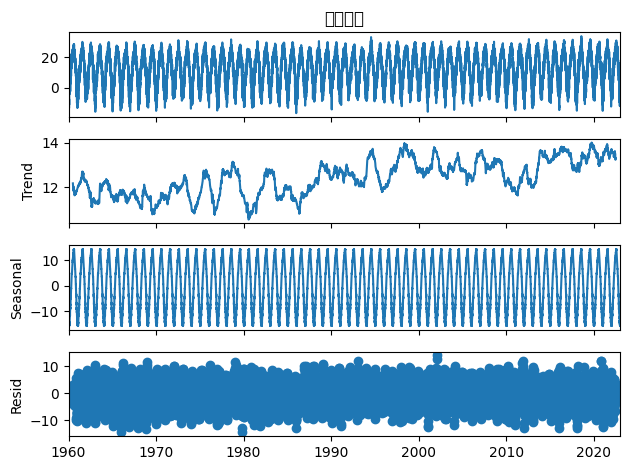

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

s_revenue = df1.loc[:, '평균기온']
result = seasonal_decompose(s_revenue, model='additive', period=365)
result.plot()
plt.show()

In [ ]:
# 이동평균: q값
# trend 추출 때 많이 쓴다.

In [14]:
df1['평균기온'].rolling(window=365).mean()

일시
1960-01-01          NaN
1960-01-02          NaN
1960-01-03          NaN
1960-01-04          NaN
1960-01-05          NaN
                ...    
2022-12-27    13.282192
2022-12-28    13.284384
2022-12-29    13.275342
2022-12-30    13.281096
2022-12-31    13.296164
Name: 평균기온, Length: 23011, dtype: float64

In [18]:
df1['평균기온']

일시
1960-01-01   -1.6
1960-01-02   -1.9
1960-01-03    4.0
1960-01-04    7.5
1960-01-05   -4.6
             ... 
2022-12-27   -2.6
2022-12-28   -3.3
2022-12-29   -2.9
2022-12-30   -1.8
2022-12-31   -1.2
Name: 평균기온, Length: 23011, dtype: float64

In [17]:
df1['평균기온'].diff()

일시
1960-01-01     NaN
1960-01-02    -0.3
1960-01-03     5.9
1960-01-04     3.5
1960-01-05   -12.1
              ... 
2022-12-27     1.3
2022-12-28    -0.7
2022-12-29     0.4
2022-12-30     1.1
2022-12-31     0.6
Name: 평균기온, Length: 23011, dtype: float64

In [19]:
# SARIMA 모델의 최적 하이퍼 파라미터를 탐색한다.
# parameter search
p = range(0, 5)
d = range(0, 2)
q = range(5, 6)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq:
        try:
            model = SARIMAX(df1['평균기온'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i}, {j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
        except Exception as e:
            print(e)
            continue

SARIMA : (0, 0, 5), (0, 0, 5, 10) >> AIC : 113223.14
SARIMA : (0, 0, 5), (0, 1, 5, 10) >> AIC : 109298.86
SARIMA : (0, 0, 5), (1, 0, 5, 10) >> AIC : 108700.49
SARIMA : (0, 0, 5), (1, 1, 5, 10) >> AIC : 109150.66
SARIMA : (0, 0, 5), (2, 0, 5, 10) >> AIC : 107978.23


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 5), (2, 1, 5, 10) >> AIC : 101926.24
SARIMA : (0, 0, 5), (3, 0, 5, 10) >> AIC : 108047.75



KeyboardInterrupt



In [20]:
# optimal parameter
optim = [(params[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print(optim)

[(((0, 0, 5), (2, 1, 5, 10)), 101926.24)]


In [22]:
model = SARIMAX(df1['평균기온'].values, order=optim[0][0][0], seasonal_order=optim[0][0][1])
model_fit = model.fit()

model_fit.summary()

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                23011
Model:             SARIMAX(0, 0, 5)x(2, 1, 5, 10)   Log Likelihood              -50950.120
Date:                            Tue, 26 Dec 2023   AIC                         101926.239
Time:                                    00:09:27   BIC                         102030.802
Sample:                                         0   HQIC                        101960.219
                                          - 23011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9689      0.006    166.806      0.000       0.957       0.980
ma.L2          0.5810      0.008     69.883      0.000       0.565       0.597
ma.L3          0.3332      0.009     38.554      0.000       0.316       0.350
ma.L4          0.1847      0.008     22.565      0.000       0.169       0.201
ma.L5          0.0700      0.006     11.585      0.000       0.058       0.082
ar.S.L10       1.9655      0.000   4759.588      0.000       1.965       1.966
ar.S.L20      -0.9948      0.000  -2444.959      0.000      -0.996      -0.994
ma.S.L10      -2.8691      0.006   -469.213      0.000      -2.881      -2.857
ma.S.L20       2.7611      0.018    152.881      0.000       2.726       2.796
ma.S.L30      -0.9132      0.024    -38.848      0.000      -0.959      -0.867
ma.S.L40       0.0463      0.018      2.544      0.011       0.011       0.082
ma.S.L50      -0.0245      0.006     -3.967      0.000      -0.037      -0.012
sigma2         4.8654      0.036    136.719      0.000       4.796       4.935
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):              6441.68
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.83
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시      평균기온
0   2023-01-01 -1.855013
1   2023-01-02 -1.691565
2   2023-01-03 -1.559650
3   2023-01-04  0.101260
4   2023-01-05  0.240441
..         ...       ...
353 2023-12-20  2.628559
354 2023-12-21  2.596646
355 2023-12-22  2.403553
356 2023-12-23  2.584728
357 2023-12-24  2.547675

[358 rows x 2 columns]


In [24]:
forecast_df.to_csv('sub_2.csv', index=False)

# 3rd Trial

In [7]:
# SARIMA 모델의 최적 하이퍼 파라미터를 탐색한다.
# parameter search
p = range(2, 5)
d = range(1, 2)
q = range(5, 6)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq:
        try:
            model = SARIMAX(df1['평균기온'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i}, {j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
        except Exception as e:
            print(e)
            continue

SARIMA : (2, 1, 5), (2, 1, 5, 10) >> AIC : 101859.21


KeyboardInterrupt: 

In [8]:
# optimal parameter
optim = [(params[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print(optim)

[(((2, 1, 5), (2, 1, 5, 10)), 101859.21)]


In [9]:
model = SARIMAX(df1['평균기온'].values, order=optim[0][0][0], seasonal_order=optim[0][0][1])
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                23011
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 10)   Log Likelihood              -50914.606
Date:                            Wed, 27 Dec 2023   AIC                         101859.212
Time:                                    00:37:45   BIC                         101979.860
Sample:                                         0   HQIC                        101898.419
                                          - 23011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0878      0.313      0.280      0.779      -0.526       0.702
ar.L2         -0.2080      0.094     -2.213      0.027      -0.392      -0.024
ma.L1         -0.0658      0.313     -0.210      0.834      -0.679       0.548
ma.L2         -0.1206      0.089     -1.350      0.177      -0.296       0.054
ma.L3         -0.1570      0.103     -1.524      0.128      -0.359       0.045
ma.L4         -0.1304      0.047     -2.746      0.006      -0.223      -0.037
ma.L5         -0.0521      0.021     -2.535      0.011      -0.092      -0.012
ar.S.L10      -1.7543      0.047    -37.651      0.000      -1.846      -1.663
ar.S.L20      -0.9086      0.046    -19.653      0.000      -0.999      -0.818
ma.S.L10       0.7597      0.047     16.103      0.000       0.667       0.852
ma.S.L20      -0.8189      0.022    -37.921      0.000      -0.861      -0.777
ma.S.L30      -0.8871      0.048    -18.402      0.000      -0.982      -0.793
ma.S.L40      -0.0228      0.008     -2.923      0.003      -0.038      -0.008
ma.S.L50      -0.0307      0.006     -4.809      0.000      -0.043      -0.018
sigma2         4.8850      0.042    116.442      0.000       4.803       4.967
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6670.22
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.78
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시      평균기온
0   2023-01-01 -1.976281
1   2023-01-02 -2.707498
2   2023-01-03 -3.214060
3   2023-01-04 -3.222804
4   2023-01-05 -3.257326
..         ...       ...
353 2023-12-20 -3.107449
354 2023-12-21 -3.143544
355 2023-12-22 -3.106807
356 2023-12-23 -3.168759
357 2023-12-24 -3.172463

[358 rows x 2 columns]


In [11]:
forecast_df.to_csv('sub_3.csv', index=False)

# 4th Trial

In [7]:
# SARIMA 모델의 최적 하이퍼 파라미터를 탐색한다.
# parameter search
p = range(1, 5)
d = range(0, 2)
q = range(5, 6)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq:
        try:
            model = SARIMAX(df1['평균기온'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i}, {j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
        except Exception as e:
            print(e)
            continue

SARIMA : (1, 0, 5), (1, 0, 5, 12) >> AIC : 101757.35
SARIMA : (1, 0, 5), (1, 1, 5, 12) >> AIC : 101785.18


KeyboardInterrupt: 

In [21]:
# optimal parameter
optim = [(params[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print(optim)

[(((1, 0, 5), (1, 0, 5, 12)), 101757.35)]


In [22]:
model = SARIMAX(df1['평균기온'].values, order=optim[0][0][0], seasonal_order=optim[0][0][1])
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                23011
Model:             SARIMAX(1, 0, 5)x(1, 0, 5, 12)   Log Likelihood              -50865.675
Date:                            Thu, 28 Dec 2023   AIC                         101757.350
Time:                                    00:01:55   BIC                         101861.919
Sample:                                         0   HQIC                        101791.331
                                          - 23011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.000   2095.150      0.000       0.998       1.000
ma.L1          0.0176      0.006      3.089      0.002       0.006       0.029
ma.L2         -0.3293      0.006    -53.256      0.000      -0.341      -0.317
ma.L3         -0.1883      0.006    -31.021      0.000      -0.200      -0.176
ma.L4         -0.0754      0.006    -12.564      0.000      -0.087      -0.064
ma.L5         -0.0196      0.006     -3.295      0.001      -0.031      -0.008
ar.S.L12       0.9343      0.026     36.490      0.000       0.884       0.984
ma.S.L12      -0.9207      0.026    -35.125      0.000      -0.972      -0.869
ma.S.L24       0.0242      0.008      2.935      0.003       0.008       0.040
ma.S.L36      -0.0048      0.008     -0.580      0.562      -0.021       0.011
ma.S.L48      -0.0178      0.008     -2.091      0.037      -0.034      -0.001
ma.S.L60      -0.0210      0.007     -3.169      0.002      -0.034      -0.008
sigma2         4.8690      0.033    145.901      0.000       4.804       4.934
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7098.97
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.81
Prob(H) (two-sided):                  0.22   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시      평균기온
0   2023-01-01 -2.032931
1   2023-01-02 -2.648091
2   2023-01-03 -2.869847
3   2023-01-04 -3.197073
4   2023-01-05 -3.547034
..         ...       ...
353 2023-12-20 -0.741949
354 2023-12-21 -0.743529
355 2023-12-22 -0.745936
356 2023-12-23 -0.720016
357 2023-12-24 -0.735275

[358 rows x 2 columns]


In [24]:
forecast_df.to_csv('sub_4.csv', index=False)

In [19]:
df

일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온  \
0     1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7    NaN   NaN  -1.6   
1     1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0    NaN   NaN  -1.9   
2     1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0    NaN   NaN   4.0   
3     1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6    NaN   NaN   7.5   
4     1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2    NaN   NaN  -4.6   
...          ...   ...   ...   ...  ...   ...   ...  ...    ...   ...   ...   
23006 2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  10.25  91.7  -2.6   
23007 2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  10.86  90.6  -3.3   
23008 2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  10.88  93.8  -2.9   
23009 2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  10.84  82.3  -1.8   
23010 2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1   4.16  11.5  -1.2   

       year  
0      1960  
1      1960  
2      1960  
3      1960  
4      1960  
...     ...  
23006  2022  
23007  2022  
23008  2022  
23009  2022  
23010  2022  

[23011 rows x 12 columns]

# 수정본

In [ ]:
# SARIMA 모델의 최적 하이퍼 파라미터를 탐색한다.
# parameter search
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq:
        try:
            model = SARIMAX(df1['평균기온'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i}, {j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
        except Exception as e:
            print(e)
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 193627.17
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 174046.86
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 170046.83
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 165902.59
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 168251.04
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 162895.52
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 166674.88
Unable to allocate 1.89 GiB for an array with shape (105, 105, 23012) and data type float64


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 165211.39
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 150140.64
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 146437.49
Unable to allocate 1.93 GiB for an array with shape (106, 106, 23011) and data type float64
Unable to allocate 475. MiB for an array with shape (52, 52, 23011) and data type float64
Unable to allocate 512. MiB for an array with shape (54, 54, 23012) and data type float64
Unable to allocate 1.85 GiB for an array with shape (104, 104, 23011) and data type float64
Unable to allocate 1.93 GiB for an array with shape (106, 106, 23011) and data type float64
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 105050.24
SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 105042.1
Unable to allocate 512. MiB for an array with shape (54, 54, 23011) and data type float64
Unable to allocate 1.93 GiB for an array with shape (106, 106, 23012) and data type float64
Unable to allocate 493. MiB for an array with shape (53, 53, 23011) and data type float64
Unable t

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\linalg\linalg.py:2027: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)


Unable to allocate 180. KiB for an array with shape (1, 1, 23011) and data type float64
Unable to allocate 18.5 MiB for an array with shape (23115, 105) and data type float64
Unable to allocate 9.30 MiB for an array with shape (53, 23011) and data type float64
Unable to allocate 18.5 MiB for an array with shape (23063, 105) and data type float64
Unable to allocate 9.33 MiB for an array with shape (23063, 53) and data type float64
Unable to allocate 18.5 MiB for an array with shape (23115, 105) and data type float64
Unable to allocate 9.30 MiB for an array with shape (23011, 53) and data type float64
Unable to allocate 18.5 MiB for an array with shape (23063, 105) and data type float64
Unable to allocate 719. KiB for an array with shape (2, 2, 23011) and data type float64
Unable to allocate 18.5 MiB for an array with shape (23115, 105) and data type float64
Unable to allocate 512. MiB for an array with shape (54, 54, 23011) and data type float64


In [20]:
# .forecast????

In [25]:
# linear 혹은 sigmoid로 평균기온 넣고 그 기울기를 평균기온에 합해보기

In [ ]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df1['평균기온'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 193619.75
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 173682.99
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 170040.39
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 165511.51
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 167860.27
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 162495.61
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 166291.01


## 시그모이드 함수

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

temp_data = df1['평균기온']
sigmoid_temp = sigmoid(temp_data)
gradient = sigmoid_derivative(temp_data)
gradient

일시
1960-01-01    0.139764
1960-01-02    0.113180
1960-01-03    0.017663
1960-01-04    0.000552
1960-01-05    0.009853
                ...   
2022-12-27    0.064358
2022-12-28    0.034306
2022-12-29    0.049434
2022-12-30    0.121729
2022-12-31    0.177894
Name: 평균기온, Length: 23011, dtype: float64

In [7]:
df1['평균기온'] += gradient
df1

평균기온
일시                  
1960-01-01 -1.460236
1960-01-02 -1.786820
1960-01-03  4.017663
1960-01-04  7.500552
1960-01-05 -4.590147
...              ...
2022-12-27 -2.535642
2022-12-28 -3.265694
2022-12-29 -2.850566
2022-12-30 -1.678271
2022-12-31 -1.022106

[23011 rows x 1 columns]

In [11]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df1.index = pd.to_datetime(df1.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
filtered_data = df1[df1.index.isin(date_range)]

# 추출된 데이터 확인
filtered_data

평균기온
일시                   
1960-01-03   4.017663
1960-01-10   2.289800
1960-01-17  -5.295058
1960-01-24 -12.499996
1960-01-31   2.664358
...               ...
2022-11-27   5.404476
2022-12-04  -3.471547
2022-12-11   1.739764
2022-12-18  -9.499925
2022-12-25  -5.395524

[3287 rows x 1 columns]

In [10]:
df1.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', name='일시', length=23011)

In [12]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(filtered_data['평균기온'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 27645.95
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 24302.39
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 18786.35
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 16991.27
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 18748.21
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 17291.64
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 17606.03
SARIMA : (0, 0, 0), (1, 1, 1, 52) >> AIC : 16996.31
SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 24574.4
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 22481.63
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 18763.52
SARIMA : (0, 0, 1), (0, 1, 1, 52) >> AIC : 16935.64
SARIMA : (0, 0, 1), (1, 0, 0, 52) >> AIC : 18720.33
SARIMA : (0, 0, 1), (1, 0, 1, 52) >> AIC : 17235.39
SARIMA : (0, 0, 1), (1, 1, 0, 52) >> AIC : 17589.24
SARIMA : (0, 0, 1), (1, 1, 1, 52) >> AIC : 16943.62
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 19148.39
SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 18787.74
SARIMA : (0, 1, 0), (0, 1, 0, 52) >> AIC : 20750.1
SARIMA : (0, 1

In [26]:
# optimal parameter
optim = [(param_list[param], param_seasonal) for param, param_seasonal in enumerate(results_AIC_list) if param_seasonal == min(results_AIC_list)]
print(optim)

[((1, 0, 1), 16848.645731110726)]


In [27]:
# SARIMAX 모델 생성
order = optim[0][0]  # SARIMA의 order 파라미터
seasonal_order = (0, 1, 1, 52) 

model = SARIMAX(filtered_data['평균기온'].values, order=order, seasonal_order=seasonal_order, enforce_stationarity = False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3287
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 52)   Log Likelihood               -8420.479
Date:                            Fri, 29 Dec 2023   AIC                          16848.958
Time:                                    01:26:37   BIC                          16873.218
Sample:                                         0   HQIC                         16857.659
                                           - 3287                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8487      0.026     32.562      0.000       0.798       0.900
ma.L1         -0.7172      0.034    -21.125      0.000      -0.784      -0.651
ma.S.L52      -0.8171      0.011    -75.973      0.000      -0.838      -0.796
sigma2        11.5497      0.243     47.567      0.000      11.074      12.026
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               166.80
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.28
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시      평균기온
0   2023-01-01 -5.452632
1   2023-01-02 -5.369117
2   2023-01-03 -5.286881
3   2023-01-04 -5.205905
4   2023-01-05 -5.126169
..         ...       ...
353 2023-12-20 -0.023461
354 2023-12-21 -0.023101
355 2023-12-22 -0.022747
356 2023-12-23 -0.022399
357 2023-12-24 -0.022056

[358 rows x 2 columns]


In [21]:
forecast_df.to_csv('sub_5.csv', index=False)

# Sigmoid --> Retry

C:\Users\navyb\AppData\Local\Temp\ipykernel_26868\1436061853.py:3: RuntimeWarning: overflow encountered in exp
  y = L / (1 +np.exp(-k*(x-x0)))


추정된 파라미터:
L (최대값): 12.431373993907684
k (곡선의 기울기): 0.02109944199645931
x0 (시작점): 1.7323378231908686


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


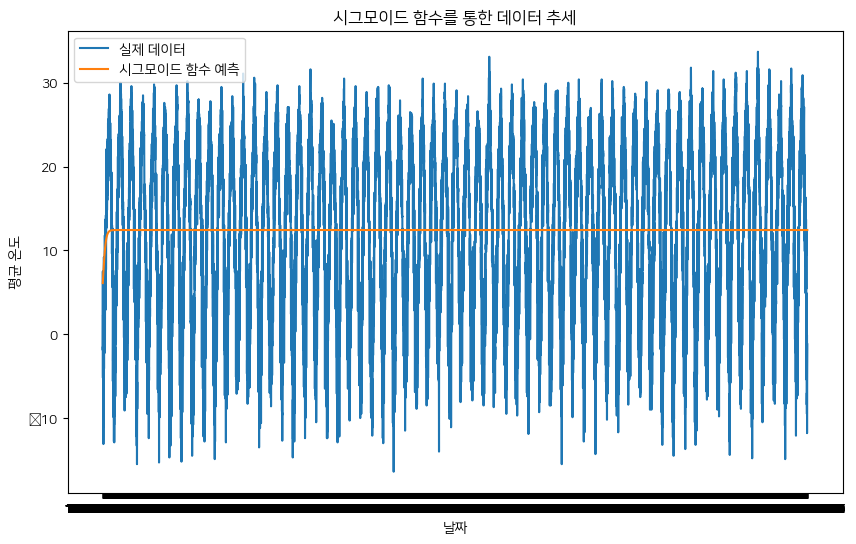

In [8]:
# 평균온도를 시그모이드 함수에 fit 해보기
def sigmoid(x, L, k, x0):
    y = L / (1 +np.exp(-k*(x-x0)))
    return y

dates = df1.index
temperature = df1['평균기온']

s_df = pd.DataFrame({'Date': dates, 'Temperature': temperature})

# x와 y 값 정의
x = np.arange(len(s_df))
y = s_df['Temperature'].values

popt, pcov = curve_fit(sigmoid, x, y, method='dogbox')

# 추정된 파라미터 출력
print("추정된 파라미터:")
print("L (최대값):", popt[0])
print("k (곡선의 기울기):", popt[1])
print("x0 (시작점):", popt[2])

# 시그모이드 함수로 예측된 값
y_pred = sigmoid(x, *popt)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(s_df['Date'], y, label='실제 데이터')
plt.plot(s_df['Date'], y_pred, label='시그모이드 함수 예측')
plt.xlabel('날짜')
plt.ylabel('평균 온도')
plt.title('시그모이드 함수를 통한 데이터 추세')
plt.legend()
plt.show()

In [9]:
df2 = df1.copy()  # 기존 데이터프레임을 복사하여 새로운 데이터프레임 생성

# '평균기온' 열의 각 항목에 추정된 기울기(popt[1])를 더함
df2['평균기온'] += popt[1]

# 새로운 데이터프레임 df2 출력
df2

평균기온
일시                  
1960-01-01 -1.578901
1960-01-02 -1.878901
1960-01-03  4.021099
1960-01-04  7.521099
1960-01-05 -4.578901
...              ...
2022-12-27 -2.578901
2022-12-28 -3.278901
2022-12-29 -2.878901
2022-12-30 -1.778901
2022-12-31 -1.178901

[23011 rows x 1 columns]

In [11]:
df2.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='일시', length=23011, freq=None)

In [13]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df2.index = pd.to_datetime(df2.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
filtered_data = df2[df2.index.isin(date_range)]

# 추출된 데이터 확인
filtered_data

평균기온
일시                   
1960-01-03   4.021099
1960-01-10   2.221099
1960-01-17  -5.278901
1960-01-24 -12.478901
1960-01-31   2.621099
...               ...
2022-11-27   5.421099
2022-12-04  -3.478901
2022-12-11   1.621099
2022-12-18  -9.478901
2022-12-25  -5.378901

[3287 rows x 1 columns]

In [14]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(filtered_data['평균기온'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 27652.3
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 24308.85
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 18788.32
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 16995.34
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 18750.23
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 17295.72
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 17609.14
SARIMA : (0, 0, 0), (1, 1, 1, 52) >> AIC : 17000.59
SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 24581.23
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 22487.43
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 18765.66
SARIMA : (0, 0, 1), (0, 1, 1, 52) >> AIC : 16940.12
SARIMA : (0, 0, 1), (1, 0, 0, 52) >> AIC : 18722.6
SARIMA : (0, 0, 1), (1, 0, 1, 52) >> AIC : 17239.8
SARIMA : (0, 0, 1), (1, 1, 0, 52) >> AIC : 17592.5
SARIMA : (0, 0, 1), (1, 1, 1, 52) >> AIC : 16948.25
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 19154.74
SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 18793.74
SARIMA : (0, 1, 0), (0, 1, 0, 52) >> AIC : 20753.37
SARIMA : (0, 1, 

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 1), (1, 0, 1, 52) >> AIC : 17151.17
SARIMA : (1, 0, 1), (1, 1, 0, 52) >> AIC : 17572.95
SARIMA : (1, 0, 1), (1, 1, 1, 52) >> AIC : 16852.56
SARIMA : (1, 1, 0), (0, 0, 0, 52) >> AIC : 18663.05
SARIMA : (1, 1, 0), (0, 0, 1, 52) >> AIC : 18257.08
SARIMA : (1, 1, 0), (0, 1, 0, 52) >> AIC : 19916.79
SARIMA : (1, 1, 0), (0, 1, 1, 52) >> AIC : 17704.86
SARIMA : (1, 1, 0), (1, 0, 0, 52) >> AIC : 18229.16
SARIMA : (1, 1, 0), (1, 0, 1, 52) >> AIC : 17988.46
SARIMA : (1, 1, 0), (1, 1, 0, 52) >> AIC : 18695.02
SARIMA : (1, 1, 0), (1, 1, 1, 52) >> AIC : 17697.2
SARIMA : (1, 1, 1), (0, 0, 0, 52) >> AIC : 18640.63
SARIMA : (1, 1, 1), (0, 0, 1, 52) >> AIC : 18212.49
SARIMA : (1, 1, 1), (0, 1, 0, 52) >> AIC : 18772.69
SARIMA : (1, 1, 1), (0, 1, 1, 52) >> AIC : 16935.47
SARIMA : (1, 1, 1), (1, 0, 0, 52) >> AIC : 18159.19
SARIMA : (1, 1, 1), (1, 0, 1, 52) >> AIC : 17227.74
SARIMA : (1, 1, 1), (1, 1, 0, 52) >> AIC : 17590.24
SARIMA : (1, 1, 1), (1, 1, 1, 52) >> AIC : 16939.36


In [15]:
# optimal parameter
optim = [(param_list[param], param_seasonal) for param, param_seasonal in enumerate(results_AIC_list) if param_seasonal == min(results_AIC_list)]
print(optim)

[((1, 0, 1), 16852.55981658955)]


In [16]:
# SARIMAX 모델 생성
order = optim[0][0]  # SARIMA의 order 파라미터
seasonal_order = (1, 1, 1, 52) 

model = SARIMAX(filtered_data['평균기온'].values, order=order, seasonal_order=seasonal_order, enforce_stationarity = False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3287
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood               -8421.280
Date:                            Fri, 29 Dec 2023   AIC                          16852.560
Time:                                    14:13:27   BIC                          16882.885
Sample:                                         0   HQIC                         16863.435
                                           - 3287                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8492      0.026     32.865      0.000       0.799       0.900
ma.L1         -0.7167      0.034    -21.222      0.000      -0.783      -0.651
ar.S.L52      -0.0040      0.002     -2.372      0.018      -0.007      -0.001
ma.S.L52      -0.8169      0.011    -75.694      0.000      -0.838      -0.796
sigma2        11.5276      0.244     47.151      0.000      11.048      12.007
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               154.93
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.26
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시       평균기온
0   2023-01-01  -2.276994
1   2023-01-02  -2.450190
2   2023-01-03  -3.414106
3   2023-01-04   0.902979
4   2023-01-05  -1.521875
..         ...        ...
353 2023-12-20  13.394461
354 2023-12-21  11.207808
355 2023-12-22  12.048533
356 2023-12-23   9.584149
357 2023-12-24   8.146000

[358 rows x 2 columns]


In [18]:
forecast_df.to_csv('sub_6.csv', index=False)

# Again..

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


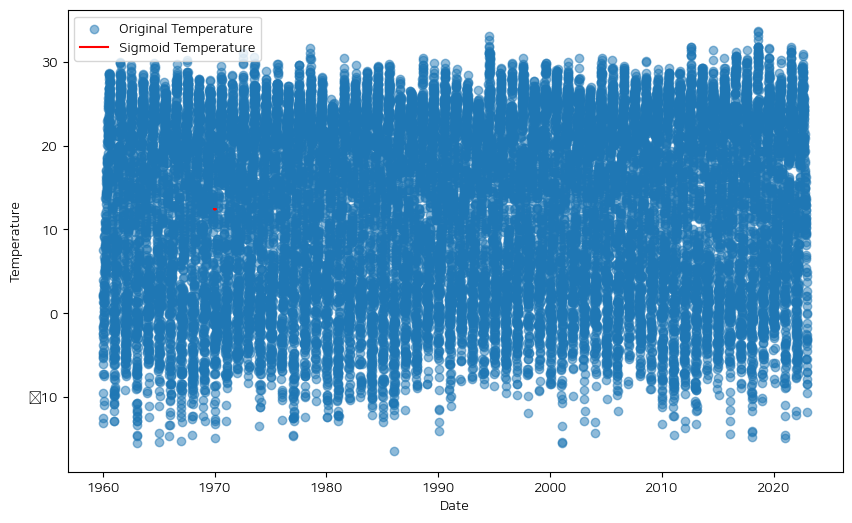

In [20]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Assuming you have a DataFrame 'df' with columns 'Date' and 'Temperature'

# Generate a sigmoid function
def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

# Convert 'Date' column to datetime if it's not already in datetime format
df1.index = pd.to_datetime(df1.index)

# Normalize date values to a range between 0 and 1
min_date = df1.index.min()
max_date = df1.index.max()
df1['Normalized_Date'] = (df1.index - min_date) / (max_date - min_date)

# Fit the sigmoid function to your temperature data
popt, _ = curve_fit(sigmoid, df1['Normalized_Date'], df1['평균기온'])

# Create a new column with the sigmoid-transformed temperature values
df1['Sigmoid_Temperature'] = sigmoid(df1['Normalized_Date'], *popt)

# Plot the sigmoid transformation (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['평균기온'], label='Original Temperature', alpha=0.5)
plt.plot(df1['평균기온'], df1['Sigmoid_Temperature'], color='red', label='Sigmoid Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [83]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df1.index = pd.to_datetime(df1.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
df1 = df1[df1.index.isin(date_range)]

# 추출된 데이터 확인
df1

평균기온
일시              
1960-01-03   4.0
1960-01-10   2.2
1960-01-17  -5.3
1960-01-24 -12.5
1960-01-31   2.6
...          ...
2022-11-27   5.4
2022-12-04  -3.5
2022-12-11   1.6
2022-12-18  -9.5
2022-12-25  -5.4

[3287 rows x 1 columns]

C:\Users\navyb\AppData\Local\Temp\ipykernel_6696\1416661762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normalized_Date'] = (df1.index - min_date) / (max_date - min_date)
C:\Users\navyb\AppData\Local\Temp\ipykernel_6696\1416661762.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normalized_Temperature'] = (df1['평균기온'] - min_temp) / (max_temp - min_temp)
C:\Users\navyb\AppData\Local\Temp\ipykernel_6696\1416661762.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

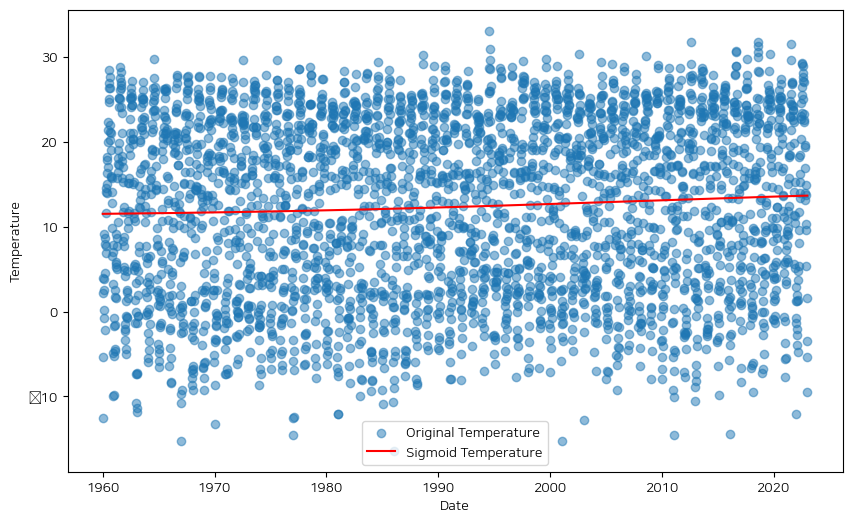

In [8]:
# Generate a sigmoid function
def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

# Convert 'Date' column to datetime if it's not already in datetime format
df1.index = pd.to_datetime(df1.index)

# Normalize date values to a range between 0 and 1
min_date = df1.index.min()
max_date = df1.index.max()
df1['Normalized_Date'] = (df1.index - min_date) / (max_date - min_date)

# Normalize temperature values to a range between 0 and 1
min_temp = df1['평균기온'].min()
max_temp = df1['평균기온'].max()
df1['Normalized_Temperature'] = (df1['평균기온'] - min_temp) / (max_temp - min_temp)

# Fit the sigmoid function to your normalized temperature data
popt, _ = curve_fit(sigmoid, df1['Normalized_Date'], df1['Normalized_Temperature'])

# Create a new column with the sigmoid-transformed temperature values
df1['Sigmoid_Temperature'] = sigmoid(df1['Normalized_Date'], *popt) * (max_temp - min_temp) + min_temp

# Plot the sigmoid transformation and original temperature data
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['평균기온'], label='Original Temperature', alpha=0.5)
plt.plot(df1.index, df1['Sigmoid_Temperature'], color='red', label='Sigmoid Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


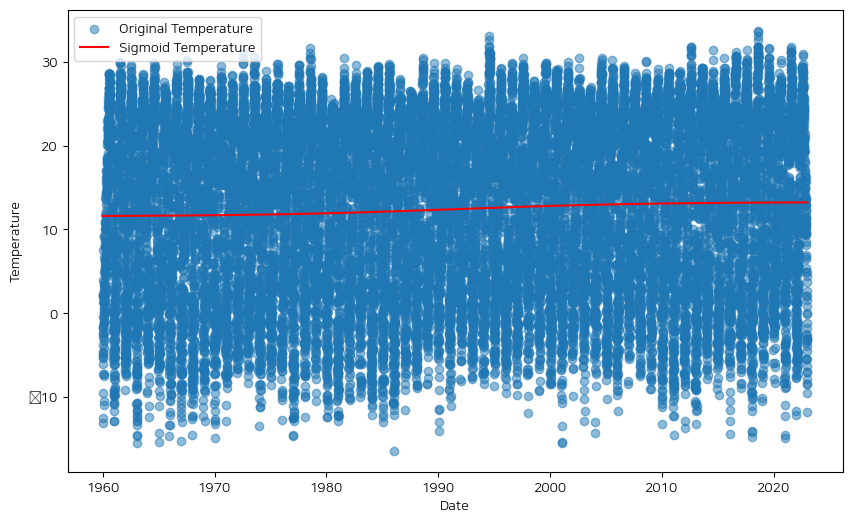

In [12]:
# Generate a sigmoid function
def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

# Convert 'Date' column to datetime if it's not already in datetime format
df1.index = pd.to_datetime(df1.index)

# Normalizing temperature values using min-max scaling to a range between -1 and 1
min_temp = df1['평균기온'].min()
max_temp = df1['평균기온'].max()
df1['Normalized_Temperature'] = (2 * (df1['평균기온'] - min_temp) / (max_temp - min_temp)) - 1

# Normalizing date values to a range between -1 and 1
min_date = df1.index.min().timestamp()
max_date = df1.index.max().timestamp()
df1['Normalized_Date'] = (2 * (df1.index.astype(np.int64) / 1e9 - min_date) / (max_date - min_date)) - 1

# Fit the sigmoid function to your normalized data
popt, _ = curve_fit(sigmoid, df1['Normalized_Date'], df1['Normalized_Temperature'])

# Create a new column with the sigmoid-transformed temperature values
df1['Sigmoid_Temperature'] = sigmoid(df1['Normalized_Date'], *popt)

# De-normalize the sigmoid-transformed temperature values back to the original range
df1['Sigmoid_Temperature'] = ((df1['Sigmoid_Temperature'] + 1) * (max_temp - min_temp) / 2) + min_temp

# Plot the sigmoid transformation and original temperature data
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['평균기온'], label='Original Temperature', alpha=0.5)
plt.plot(df1.index, df1['Sigmoid_Temperature'], color='red', label='Sigmoid Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [4]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df1.index = pd.to_datetime(df1.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
df1 = df1[df1.index.isin(date_range)]

# 추출된 데이터 확인
df1

평균기온
일시              
1960-01-03   4.0
1960-01-10   2.2
1960-01-17  -5.3
1960-01-24 -12.5
1960-01-31   2.6
...          ...
2022-11-27   5.4
2022-12-04  -3.5
2022-12-11   1.6
2022-12-18  -9.5
2022-12-25  -5.4

[3287 rows x 1 columns]

C:\Users\navyb\AppData\Local\Temp\ipykernel_6696\3147276032.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x'] = np.arange(1, len(df1) + 1)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


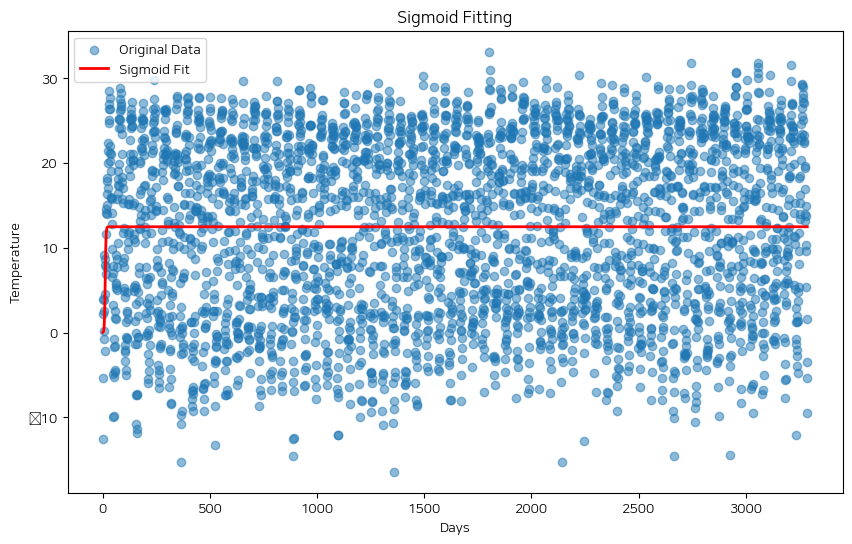

In [19]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df1' with columns 'Date' and 'Temperature'

# Convert 'Date' column to datetime if it's not already in datetime format
df1.index = pd.to_datetime(df1.index)

# Convert Date to Sequence (Because you can't regress dates)
df1['x'] = np.arange(1, len(df1) + 1)

# Define the sigmoid function
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Fit the sigmoid function to your data
popt, _ = curve_fit(sigmoid, df1['x'], df1['평균기온'])

# Save coefficients
a, b, c = popt

# Plot output
plt.figure(figsize=(10, 6))
plt.scatter(df1['x'], df1['평균기온'], label='Original Data', alpha=0.5)
plt.plot(df1['x'], sigmoid(df1['x'], a, b, c), color='red', label='Sigmoid Fit', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Sigmoid Fitting')
plt.legend()
plt.show()


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


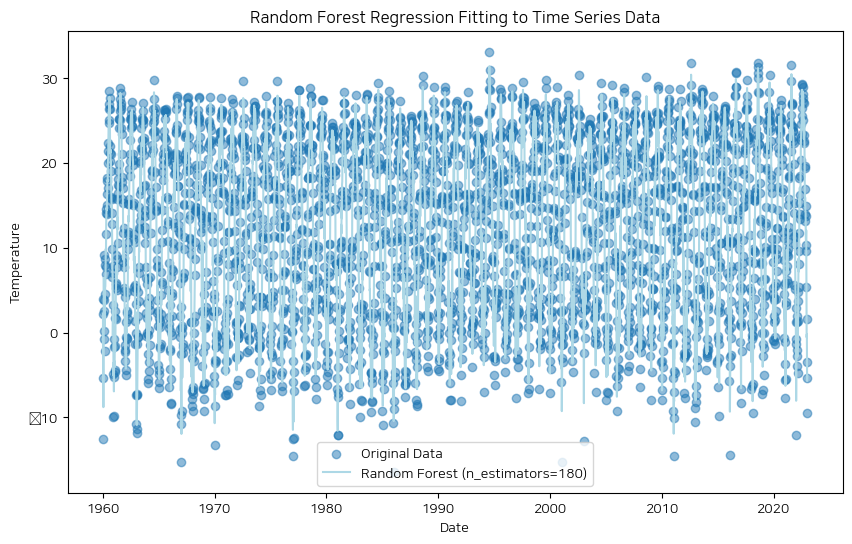

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df1' is your DataFrame with 'temperature' column and a datetime index

# Extracting features and target
X = np.arange(len(df1)).reshape(-1, 1)  # Sequence as features
y = df1['평균기온']

# Fitting a Random Forest regressor
n_estimators = 180  # Number of trees in the forest (can be adjusted)
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X, y)

# Predicting
y_pred = model.predict(X)

# Plotting the original data and the Random Forest predictions
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, y, label='Original Data', alpha=0.5)
plt.plot(df1.index, y_pred, color='lightblue', label=f'Random Forest (n_estimators={n_estimators})')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Random Forest Regression Fitting to Time Series Data')
plt.legend()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'df1' is your DataFrame with 'temperature' column and a datetime index

# Extracting features and target
X = np.arange(len(df1)).reshape(-1, 1)  # Sequence as features
y = df1['평균기온']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Random Forest regressor
n_estimators = 180  # Number of trees in the forest
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, y_train)

# Predicting on train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")


Train RMSE: 1.395648694562779
Test RMSE: 3.7807197364125344


기울기: 1.1346663331415754e-18, 절편: 11.655492357685567


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


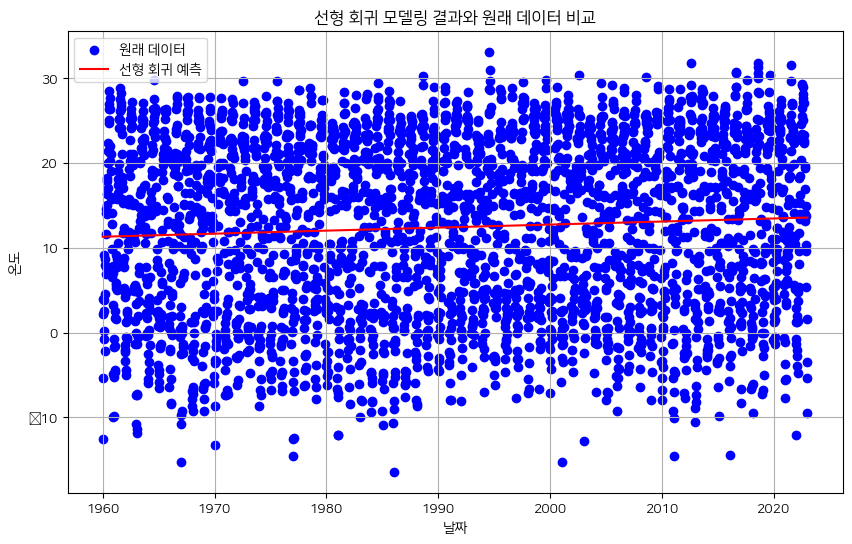

In [45]:
# 실제 데이터프레임에 맞게 수정 필요
df1.index = pd.to_datetime(df1.index)  # 날짜열을 datetime 형식으로 변환

# 선형 회귀 모델 초기화
model = LinearRegression()

# 날짜와 온도 데이터를 준비
X = df1.index.astype('int64').values.reshape(-1, 1)  # 날짜를 숫자형으로 변환하여 입력 데이터로 사용
y = df1['평균기온'].values

# 모델 훈련
model.fit(X, y)

# 선형 회귀의 기울기와 절편 확인
slope = model.coef_[0]
intercept = model.intercept_
print(f"기울기: {slope}, 절편: {intercept}")

# 결과를 그래프로 표시
plt.figure(figsize=(10, 6))

# 원래 데이터 그래프
plt.scatter(df1.index, df1['평균기온'], color='blue', label='원래 데이터')

# 선형 회귀로 생성된 예측 선 그래프
plt.plot(df1.index, model.predict(X), color='red', label='선형 회귀 예측')

plt.title('선형 회귀 모델링 결과와 원래 데이터 비교')
plt.xlabel('날짜')
plt.ylabel('온도')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 실제 데이터프레임에 맞게 수정 필요
df1.index = pd.to_datetime(df1.index)  # 날짜열을 datetime 형식으로 변환

# 시그모이드 함수를 활용한 로지스틱 회귀 모델 초기화
model = LogisticRegression(solver='lbfgs')

# 날짜와 온도 데이터를 준비
X = df1.index.astype('int64').values.reshape(-1, 1)  # 날짜를 숫자형으로 변환하여 입력 데이터로 사용
y = np.where(df1['평균기온'] > df1['평균기온'].shift(1), 1, 0)  # 온도 상승 시 1, 하락 시 0으로 이진 분류

# 모델 훈련
model.fit(X, y)

# 예측을 위해 새로운 날짜 데이터를 준비해야 함
new_dates = pd.date_range(start=df1.index[0], end=df1.index[-1] + pd.Timedelta(days=3))  # 예측을 위한 새로운 날짜 생성
new_dates_as_int = new_dates.astype('int64').values.reshape(-1, 1)  # 날짜를 숫자형으로 변환하여 입력 데이터로 사용

# 로지스틱 회귀 모델로 예측
predictions = model.predict(new_dates_as_int)

# 결과를 그래프로 표시
plt.figure(figsize=(10, 6))

# 원래 데이터 그래프
plt.scatter(df1.index, df1['온도'], color='blue', label='원래 데이터')

# 로지스틱 회귀로 생성된 예측 선 그래프
plt.plot(new_dates, predictions, color='red', label='시그모이드 함수로 예측', marker='o')

plt.title('시그모이드 함수로 모델링한 결과와 원래 데이터 비교')
plt.xlabel('날짜')
plt.ylabel('온도')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


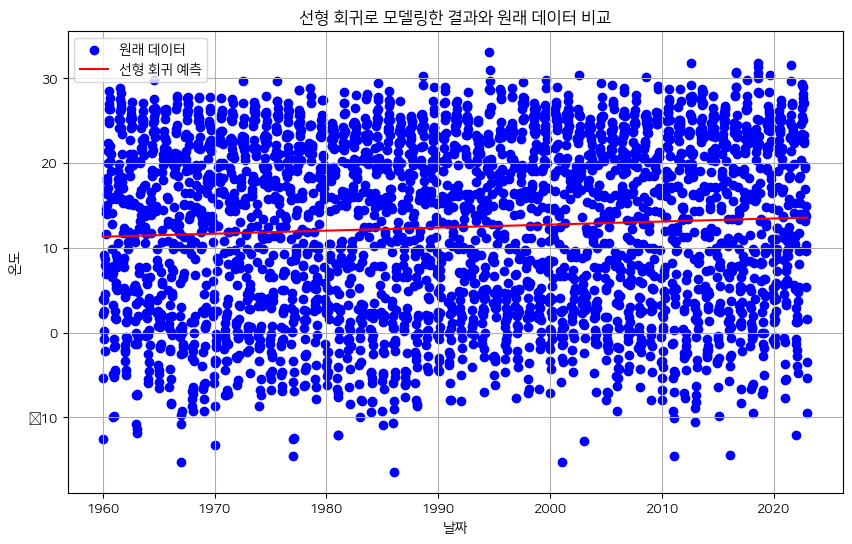

In [50]:
df1.index = pd.to_datetime(df1.index)  # 날짜열을 datetime 형식으로 변환

# 선형 회귀 모델 초기화
model = LinearRegression()

# 날짜와 온도 데이터를 준비
X = df1.index.astype('int64').values.reshape(-1, 1)  # 날짜를 숫자형으로 변환하여 입력 데이터로 사용
y = df1['평균기온'].values

# 모델 훈련
model.fit(X, y)

# 결과를 그래프로 표시
plt.figure(figsize=(10, 6))

# 원래 데이터 그래프
plt.scatter(df1.index, df1['평균기온'], color='blue', label='원래 데이터')

# 선형 회귀로 생성된 예측 선 그래프
plt.plot(df1.index, model.predict(X), color='red', label='선형 회귀 예측')

plt.title('선형 회귀로 모델링한 결과와 원래 데이터 비교')
plt.xlabel('날짜')
plt.ylabel('온도')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
import numpy as np

def fft_denoiser(signal, threshold, plot=False):
    # FFT 수행
    fourier = np.fft.fft(signal)
    
    # FFT 결과의 복사본 생성
    clean_fourier = fourier.copy()
    
    # 임계값 이하의 주파수 성분을 제거하여 노이즈 제거
    clean_fourier[np.abs(fourier) < threshold] = 0
    
    # 역 FFT를 사용하여 필터링된 결과 얻기
    cleaned_signal = np.fft.ifft(clean_fourier)
    
    # 결과 반환
    if plot:
        plt.figure(figsize=(20, 12))
        plt.plot(np.abs(fourier), label='Original FFT')
        plt.plot(np.abs(clean_fourier), label=f'Filtered FFT (threshold={threshold})')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.title('FFT and Filtered FFT Comparison')
        plt.show()
    
    return cleaned_signal.real  # 허수 부분 제거하여 실수 부분 반환


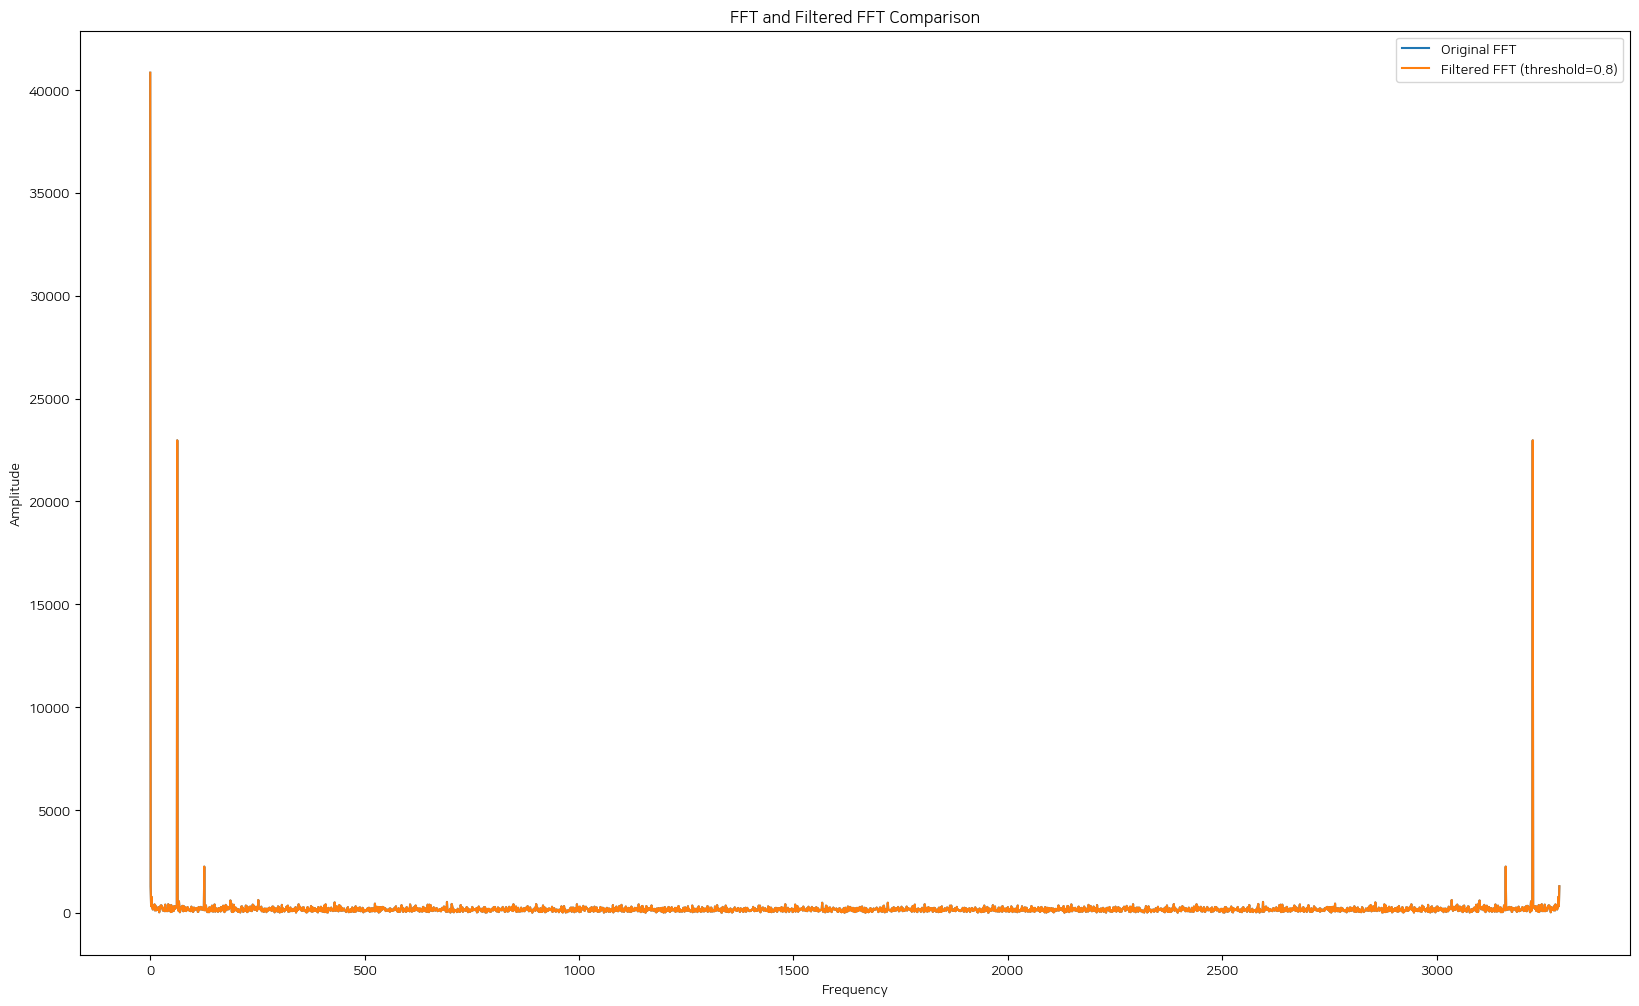

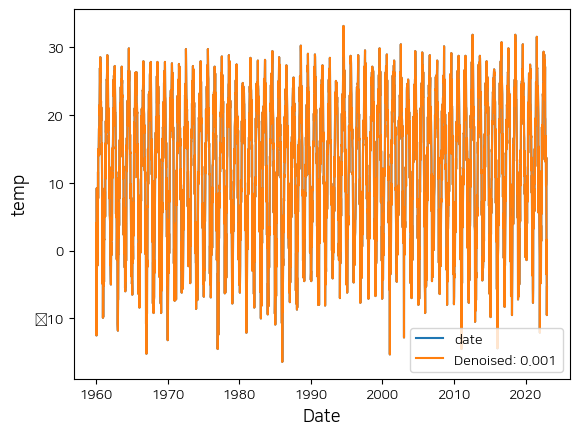

In [80]:
denoised_temp = fft_denoiser(df1['평균기온'], 0.8, True)
plt.plot(df1.index, df1['평균기온'])
plt.plot(df1.index, denoised_temp)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('temp', fontsize = 13)
plt.legend(['date','Denoised: 0.001'])
plt.show()

In [77]:
denoised_temp

array([ 4. ,  2.2, -5.3, ...,  1.6, -9.5, -5.4])

In [84]:
# df1.index = pd.to_datetime(df1.index)  # 날짜열을 datetime 형식으로 변환

# Exponential Smoothing을 적용한 결과를 새로운 열에 추가
alpha = 0.2  # Smoothing의 정도를 조절하는 파라미터

df1['Exponential_Smoothing'] = df1['평균기온'].ewm(alpha=alpha, adjust=False).mean()

# 결과 출력
print(df1)

            평균기온  Exponential_Smoothing
일시                                     
1960-01-03   4.0               4.000000
1960-01-10   2.2               3.640000
1960-01-17  -5.3               1.852000
1960-01-24 -12.5              -1.018400
1960-01-31   2.6              -0.294720
...          ...                    ...
2022-11-27   5.4              13.029031
2022-12-04  -3.5               9.723225
2022-12-11   1.6               8.098580
2022-12-18  -9.5               4.578864
2022-12-25  -5.4               2.583091

[3287 rows x 2 columns]


C:\Users\navyb\AppData\Local\Temp\ipykernel_6696\3547016360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Exponential_Smoothing'] = df1['평균기온'].ewm(alpha=alpha, adjust=False).mean()


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


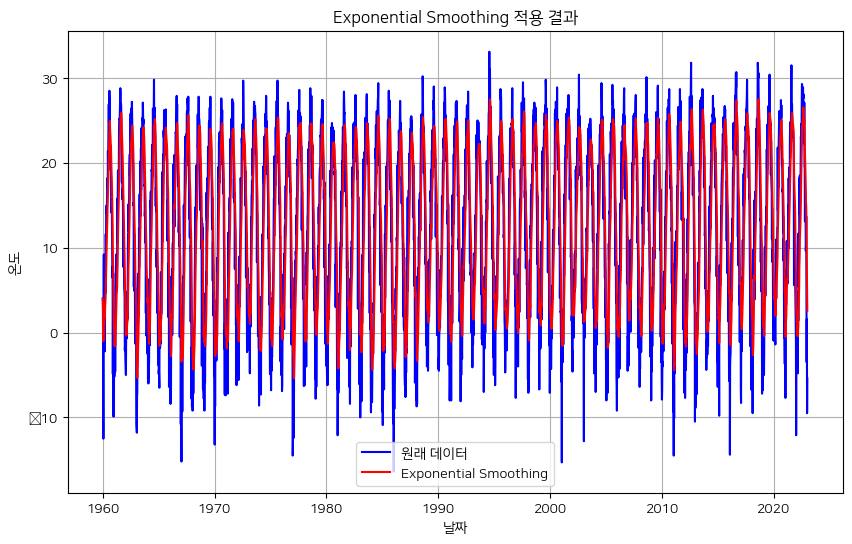

In [86]:
# 결과를 그래프로 표시
plt.figure(figsize=(10, 6))

# 원래 데이터 그래프
plt.plot(df1.index, df1['평균기온'], color='blue', label='원래 데이터')

# Exponential Smoothing 결과 그래프
plt.plot(df1.index, df1['Exponential_Smoothing'], color='red', label='Exponential Smoothing')

plt.title('Exponential Smoothing 적용 결과')
plt.xlabel('날짜')
plt.ylabel('온도')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df1['Exponential_Smoothing'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 27232.79
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 23018.49
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 12478.13
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 11211.8
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 12483.28
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 11426.82
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 11492.72
SARIMA : (0, 0, 0), (1, 1, 1, 52) >> AIC : 11217.06
SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 22880.45
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 19153.56
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 10175.34
SARIMA : (0, 0, 1), (0, 1, 1, 52) >> AIC : 8865.61
SARIMA : (0, 0, 1), (1, 0, 0, 52) >> AIC : 10182.46


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 1), (1, 0, 1, 52) >> AIC : 10237.82
SARIMA : (0, 0, 1), (1, 1, 0, 52) >> AIC : 9224.15
SARIMA : (0, 0, 1), (1, 1, 1, 52) >> AIC : 8873.05
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 10780.97
SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 9402.49
SARIMA : (0, 1, 0), (0, 1, 0, 52) >> AIC : 8605.68
SARIMA : (0, 1, 0), (0, 1, 1, 52) >> AIC : 6773.04
SARIMA : (0, 1, 0), (1, 0, 0, 52) >> AIC : 8140.5
SARIMA : (0, 1, 0), (1, 0, 1, 52) >> AIC : 6894.8
SARIMA : (0, 1, 0), (1, 1, 0, 52) >> AIC : 7570.23
SARIMA : (0, 1, 0), (1, 1, 1, 52) >> AIC : 6782.13
SARIMA : (0, 1, 1), (0, 0, 0, 52) >> AIC : 9608.24
SARIMA : (0, 1, 1), (0, 0, 1, 52) >> AIC : 8846.79
SARIMA : (0, 1, 1), (0, 1, 0, 52) >> AIC : 8597.22
SARIMA : (0, 1, 1), (0, 1, 1, 52) >> AIC : 6771.56
SARIMA : (0, 1, 1), (1, 0, 0, 52) >> AIC : 8119.7
SARIMA : (0, 1, 1), (1, 0, 1, 52) >> AIC : 6892.13
SARIMA : (0, 1, 1), (1, 1, 0, 52) >> AIC : 7561.86
SARIMA : (0, 1, 1), (1, 1, 1, 52) >> AIC : 6782.05
SARIMA : (1, 0, 0), (0, 0, 0, 52

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (0, 1, 0, 52) >> AIC : 8600.7
SARIMA : (1, 1, 0), (0, 1, 1, 52) >> AIC : 6772.95
SARIMA : (1, 1, 0), (1, 0, 0, 52) >> AIC : 8111.19
SARIMA : (1, 1, 0), (1, 0, 1, 52) >> AIC : 6894.37
SARIMA : (1, 1, 0), (1, 1, 0, 52) >> AIC : 7559.85
SARIMA : (1, 1, 0), (1, 1, 1, 52) >> AIC : 6783.81
SARIMA : (1, 1, 1), (0, 0, 0, 52) >> AIC : 7898.89
SARIMA : (1, 1, 1), (0, 0, 1, 52) >> AIC : 7680.82
SARIMA : (1, 1, 1), (0, 1, 0, 52) >> AIC : 8360.88
SARIMA : (1, 1, 1), (0, 1, 1, 52) >> AIC : 6631.11
SARIMA : (1, 1, 1), (1, 0, 0, 52) >> AIC : 7653.3
SARIMA : (1, 1, 1), (1, 0, 1, 52) >> AIC : 6753.56
SARIMA : (1, 1, 1), (1, 1, 0, 52) >> AIC : 7337.38
SARIMA : (1, 1, 1), (1, 1, 1, 52) >> AIC : 6639.77


In [88]:
# optimal parameter
optim = [(param_list[param], param_seasonal) for param, param_seasonal in enumerate(results_AIC_list) if param_seasonal == min(results_AIC_list)]
print(optim)

[((1, 0, 1), 6619.7707347903815)]


In [90]:
# SARIMAX 모델 생성
order = optim[0][0]  # SARIMA의 order 파라미터
seasonal_order = (0, 1, 1, 52) 

model = SARIMAX(df1['Exponential_Smoothing'].values, order=order, seasonal_order=seasonal_order, enforce_stationarity = False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3287
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 52)   Log Likelihood               -3305.885
Date:                            Fri, 29 Dec 2023   AIC                           6619.771
Time:                                    17:23:20   BIC                           6644.031
Sample:                                         0   HQIC                          6628.471
                                           - 3287                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8956      0.008    111.979      0.000       0.880       0.911
ma.L1          0.0320      0.017      1.879      0.060      -0.001       0.065
ma.S.L52      -0.8100      0.011    -74.381      0.000      -0.831      -0.789
sigma2         0.4637      0.010     47.511      0.000       0.445       0.483
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               159.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.27
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시       평균기온
0   2023-01-01   1.672072
1   2023-01-02   0.912743
2   2023-01-03   0.095919
3   2023-01-04   0.304888
4   2023-01-05  -0.032312
..         ...        ...
353 2023-12-20  19.266707
354 2023-12-21  17.660316
355 2023-12-22  16.558848
356 2023-12-23  15.173745
357 2023-12-24  13.783706

[358 rows x 2 columns]


In [92]:
forecast_df.to_csv('sub_7.csv', index=False)

In [5]:
from scipy.signal import butter, filtfilt

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:1

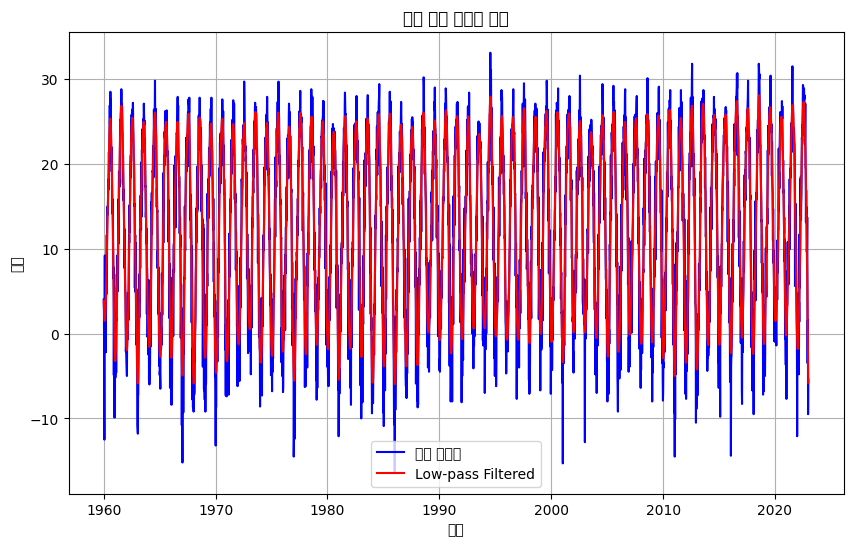

In [6]:
# Butterworth 필터를 위한 설정
cutoff_frequency = 0.1  # 저역 통과 필터의 컷오프 주파수

# Butterworth 필터 계수 계산
b, a = butter(2, cutoff_frequency, btype='low', analog=False)

# 저역 통과 필터 적용
filtered_temperature = filtfilt(b, a, df1['평균기온'])

# 결과를 그래프로 표시
plt.figure(figsize=(10, 6))

# 원래 데이터 그래프
plt.plot(df1.index, df1['평균기온'], color='blue', label='원래 데이터')

# 저역 통과 필터링 결과 그래프
plt.plot(df1.index, filtered_temperature, color='red', label='Low-pass Filtered')

plt.title('저역 통과 필터링 결과')
plt.xlabel('날짜')
plt.ylabel('온도')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
filtered_temperature

array([ 3.88865152,  3.02316168,  2.27426644, ..., -0.99252129,
       -3.43888159, -5.79833547])

In [8]:
import pandas as pd

# df1의 index와 denoised_temp를 사용하여 새로운 DataFrame(df2) 생성
df2 = pd.DataFrame({'일시': df1.index, 'filtered_temperature': filtered_temperature})
df2.set_index('일시', inplace=True)  # 날짜열을 새로운 인덱스로 설정

print(df2)


            filtered_temperature
일시                              
1960-01-03              3.888652
1960-01-10              3.023162
1960-01-17              2.274266
1960-01-24              1.753740
1960-01-31              1.507564
...                          ...
2022-11-27              3.979171
2022-12-04              1.499536
2022-12-11             -0.992521
2022-12-18             -3.438882
2022-12-25             -5.798335

[3287 rows x 1 columns]


In [9]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df2['filtered_temperature'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 27475.49
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 23154.98
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 11856.68


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 11620.28
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 11879.71


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 11874.16
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 10940.74


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 0), (1, 1, 1, 52) >> AIC : 10951.19
SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 22929.02
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 18681.85
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 7392.49
SARIMA : (0, 0, 1), (0, 1, 1, 52) >> AIC : 7360.61
SARIMA : (0, 0, 1), (1, 0, 0, 52) >> AIC : 7445.95


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 1), (1, 0, 1, 52) >> AIC : 12002.52
SARIMA : (0, 0, 1), (1, 1, 0, 52) >> AIC : 6571.8
SARIMA : (0, 0, 1), (1, 1, 1, 52) >> AIC : 6609.09
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 10493.8


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 10360.31
SARIMA : (0, 1, 0), (0, 1, 0, 52) >> AIC : 232.83


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 0), (0, 1, 1, 52) >> AIC : 204.41
SARIMA : (0, 1, 0), (1, 0, 0, 52) >> AIC : 213.37


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 0), (1, 0, 1, 52) >> AIC : 242.35
SARIMA : (0, 1, 0), (1, 1, 0, 52) >> AIC : -425.26


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 0), (1, 1, 1, 52) >> AIC : -402.76
SARIMA : (0, 1, 1), (0, 0, 0, 52) >> AIC : 5963.85


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 1), (0, 0, 1, 52) >> AIC : 5929.99


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 1), (0, 1, 0, 52) >> AIC : -4163.83


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 1), (0, 1, 1, 52) >> AIC : -4056.28
SARIMA : (0, 1, 1), (1, 0, 0, 52) >> AIC : -4170.28


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 1, 1), (1, 0, 1, 52) >> AIC : -4145.77
SARIMA : (0, 1, 1), (1, 1, 0, 52) >> AIC : -4730.67
SARIMA : (0, 1, 1), (1, 1, 1, 52) >> AIC : -4605.26
SARIMA : (1, 0, 0), (0, 0, 0, 52) >> AIC : 10493.86
SARIMA : (1, 0, 0), (0, 0, 1, 52) >> AIC : 6976.18
SARIMA : (1, 0, 0), (0, 1, 0, 52) >> AIC : 212.52
SARIMA : (1, 0, 0), (0, 1, 1, 52) >> AIC : 297.28
SARIMA : (1, 0, 0), (1, 0, 0, 52) >> AIC : 189.49


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 0), (1, 0, 1, 52) >> AIC : 236.49
SARIMA : (1, 0, 0), (1, 1, 0, 52) >> AIC : -438.48
SARIMA : (1, 0, 0), (1, 1, 1, 52) >> AIC : -391.22
SARIMA : (1, 0, 1), (0, 0, 0, 52) >> AIC : 5963.51


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 1), (0, 0, 1, 52) >> AIC : 2528.82
SARIMA : (1, 0, 1), (0, 1, 0, 52) >> AIC : -4176.1
SARIMA : (1, 0, 1), (0, 1, 1, 52) >> AIC : -2410.05
SARIMA : (1, 0, 1), (1, 0, 0, 52) >> AIC : -4193.28
SARIMA : (1, 0, 1), (1, 0, 1, 52) >> AIC : -4073.41
SARIMA : (1, 0, 1), (1, 1, 0, 52) >> AIC : -4742.29
SARIMA : (1, 0, 1), (1, 1, 1, 52) >> AIC : -4697.45
SARIMA : (1, 1, 0), (0, 0, 0, 52) >> AIC : -2889.36


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (0, 0, 1, 52) >> AIC : -2803.41


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (0, 1, 0, 52) >> AIC : -7758.46


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (0, 1, 1, 52) >> AIC : -7611.36
SARIMA : (1, 1, 0), (1, 0, 0, 52) >> AIC : -7929.82


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (1, 0, 1, 52) >> AIC : -7788.67


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (1, 1, 0, 52) >> AIC : -8403.6


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 0), (1, 1, 1, 52) >> AIC : -8328.72
SARIMA : (1, 1, 1), (0, 0, 0, 52) >> AIC : -7399.66


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 1), (0, 0, 1, 52) >> AIC : -6756.69


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 1), (0, 1, 0, 52) >> AIC : -12080.32


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 1), (0, 1, 1, 52) >> AIC : -11459.61
SARIMA : (1, 1, 1), (1, 0, 0, 52) >> AIC : -12244.46
SARIMA : (1, 1, 1), (1, 0, 1, 52) >> AIC : -10354.07


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 1), (1, 1, 0, 52) >> AIC : -12655.22


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 1, 1), (1, 1, 1, 52) >> AIC : -12490.86


In [10]:
# optimal parameter
optim = [(param_list[param], param_seasonal) for param, param_seasonal in enumerate(results_AIC_list) if param_seasonal == min(results_AIC_list)]
print(optim)

[((1, 1, 1), -12655.215558851785)]


In [12]:
# SARIMAX 모델 생성
order = optim[0][0]  # SARIMA의 order 파라미터
seasonal_order = (1, 1, 0, 52) 

model = SARIMAX(df2['filtered_temperature'].values, order=order, seasonal_order=seasonal_order, enforce_stationarity = False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3287
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 52)   Log Likelihood                6331.608
Date:                             Fri, 29 Dec 2023   AIC                         -12655.216
Time:                                     20:44:06   BIC                         -12630.956
Sample:                                          0   HQIC                        -12646.515
                                            - 3287                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9653      0.004    237.724      0.000       0.957       0.973
ma.L1          1.0000      1.065      0.939      0.348      -1.088       3.088
ar.S.L52      -0.4683      0.014    -33.215      0.000      -0.496      -0.441
sigma2         0.0011      0.001      0.939      0.348      -0.001       0.003
===================================================================================
Ljung-Box (L1) (Q):                2648.27   Jarque-Bera (JB):                55.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.04
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시        평균기온
0   2023-01-01   -7.902022
1   2023-01-02   -9.605676
2   2023-01-03  -10.938917
3   2023-01-04  -11.951593
4   2023-01-05  -12.699549
..         ...         ...
353 2023-12-20 -240.483887
354 2023-12-21 -242.509125
355 2023-12-22 -244.608563
356 2023-12-23 -246.801088
357 2023-12-24 -249.099823

[358 rows x 2 columns]


In [6]:
df1['평균기온'].rolling(window=365).mean()

일시
1960-01-01          NaN
1960-01-02          NaN
1960-01-03          NaN
1960-01-04          NaN
1960-01-05          NaN
                ...    
2022-12-27    13.282192
2022-12-28    13.284384
2022-12-29    13.275342
2022-12-30    13.281096
2022-12-31    13.296164
Name: 평균기온, Length: 23011, dtype: float64

# 데이터 선형회귀화 하기

In [30]:
from sklearn.linear_model import LinearRegression

df1.index = pd.to_datetime(df1.index)
# 데이터프레임에서 독립변수(X)와 종속변수(y) 추출
X = df1.index.to_series().dt.to_period('D').dt.dayofyear.values.reshape(-1, 1)
y = df1['평균기온']  # 종속변수 선택

# 선형 회귀 모델 초기화 및 학습
lr = LinearRegression()
lr.fit(X, y)

# 회귀식의 계수(coefficients) 확인
print('회귀식의 계수:', lr.coef_)

# 회귀선의 절편(intercept) 확인
print('회귀선의 절편:', lr.intercept_)


회귀식의 계수: [0.02532054]
회귀선의 절편: 7.7785379680548505


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py

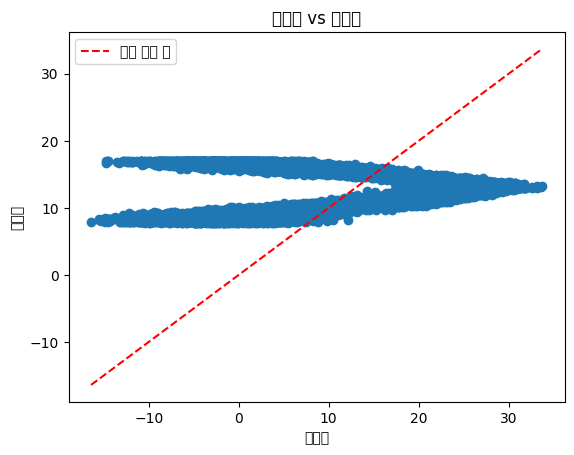

In [8]:
# 그래프로 시각화하기 위해 예측값 생성
predicted_y = model.predict(X)

# 그래프 생성
plt.scatter(y, predicted_y)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')

# 회귀선 추가
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='선형 회귀 선')
plt.legend()
plt.show()

In [31]:
# 새로운 열 생성: 기존 열에 모델의 계수를 더함
df1['linear'] = df1['평균기온'] + lr.coef_
df1

평균기온    linear
일시                        
1960-01-01  -1.6 -1.574679
1960-01-02  -1.9 -1.874679
1960-01-03   4.0  4.025321
1960-01-04   7.5  7.525321
1960-01-05  -4.6 -4.574679
...          ...       ...
2022-12-27  -2.6 -2.574679
2022-12-28  -3.3 -3.274679
2022-12-29  -2.9 -2.874679
2022-12-30  -1.8 -1.774679
2022-12-31  -1.2 -1.174679

[23011 rows x 2 columns]

In [32]:
df2 = df1.drop(columns='평균기온')
df2

linear
일시                  
1960-01-01 -1.574679
1960-01-02 -1.874679
1960-01-03  4.025321
1960-01-04  7.525321
1960-01-05 -4.574679
...              ...
2022-12-27 -2.574679
2022-12-28 -3.274679
2022-12-29 -2.874679
2022-12-30 -1.774679
2022-12-31 -1.174679

[23011 rows x 1 columns]

In [33]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df2.index = pd.to_datetime(df2.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
df2 = df2[df2.index.isin(date_range)]

# 추출된 데이터 확인
df2

linear
일시                   
1960-01-03   4.025321
1960-01-10   2.225321
1960-01-17  -5.274679
1960-01-24 -12.474679
1960-01-31   2.625321
...               ...
2022-11-27   5.425321
2022-12-04  -3.474679
2022-12-11   1.625321
2022-12-18  -9.474679
2022-12-25  -5.374679

[3287 rows x 1 columns]

In [34]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df2['linear'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 27653.6
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 24309.89
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 18788.32
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 16995.34
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 18750.25
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 17295.72
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 17609.14
SARIMA : (0, 0, 0), (1, 1, 1, 52) >> AIC : 17000.59
SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 24582.28
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 22488.24
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 18765.66
SARIMA : (0, 0, 1), (0, 1, 1, 52) >> AIC : 16940.12
SARIMA : (0, 0, 1), (1, 0, 0, 52) >> AIC : 18722.63


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (0, 0, 1), (1, 0, 1, 52) >> AIC : 17320.36
SARIMA : (0, 0, 1), (1, 1, 0, 52) >> AIC : 17592.5
SARIMA : (0, 0, 1), (1, 1, 1, 52) >> AIC : 16948.25
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 19154.74
SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 18793.74
SARIMA : (0, 1, 0), (0, 1, 0, 52) >> AIC : 20753.37
SARIMA : (0, 1, 0), (0, 1, 1, 52) >> AIC : 18517.42
SARIMA : (0, 1, 0), (1, 0, 0, 52) >> AIC : 18797.35
SARIMA : (0, 1, 0), (1, 0, 1, 52) >> AIC : 18773.46
SARIMA : (0, 1, 0), (1, 1, 0, 52) >> AIC : 19545.92
SARIMA : (0, 1, 0), (1, 1, 1, 52) >> AIC : 18507.73
SARIMA : (0, 1, 1), (0, 0, 0, 52) >> AIC : 18687.96
SARIMA : (0, 1, 1), (0, 0, 1, 52) >> AIC : 18250.05
SARIMA : (0, 1, 1), (0, 1, 0, 52) >> AIC : 18791.87
SARIMA : (0, 1, 1), (0, 1, 1, 52) >> AIC : 16993.91
SARIMA : (0, 1, 1), (1, 0, 0, 52) >> AIC : 18197.34
SARIMA : (0, 1, 1), (1, 0, 1, 52) >> AIC : 17277.84
SARIMA : (0, 1, 1), (1, 1, 0, 52) >> AIC : 17614.49
SARIMA : (0, 1, 1), (1, 1, 1, 52) >> AIC : 16992.67
SARIMA : (1, 

In [35]:
# optimal parameter
optim = [(param_list[param], param_seasonal) for param, param_seasonal in enumerate(results_AIC_list) if param_seasonal == min(results_AIC_list)]
print(optim)

[((1, 0, 1), 16852.55980771091)]


In [36]:
# SARIMAX 모델 생성
order = optim[0][0]  # SARIMA의 order 파라미터
seasonal_order = (0, 1, 1, 52) 

model = SARIMAX(df2['linear'].values, order=order, seasonal_order=seasonal_order, enforce_stationarity = False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3287
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 52)   Log Likelihood               -8422.421
Date:                            Sat, 30 Dec 2023   AIC                          16852.841
Time:                                    23:22:09   BIC                          16877.101
Sample:                                         0   HQIC                         16861.542
                                           - 3287                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8494      0.026     32.699      0.000       0.799       0.900
ma.L1         -0.7180      0.034    -21.186      0.000      -0.784      -0.652
ma.S.L52      -0.8168      0.011    -75.880      0.000      -0.838      -0.796
sigma2        11.5639      0.244     47.468      0.000      11.086      12.041
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               156.74
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.26
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시       평균기온
0   2023-01-01  -2.258633
1   2023-01-02  -2.419862
2   2023-01-03  -3.396555
3   2023-01-04   0.918648
4   2023-01-05  -1.519287
..         ...        ...
353 2023-12-20  13.402080
354 2023-12-21  11.215214
355 2023-12-22  12.057087
356 2023-12-23   9.589408
357 2023-12-24   8.153554

[358 rows x 2 columns]


In [38]:
forecast_df.to_csv('sub_9.csv', index=False)

## 시그모이드 시도

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 데이터 프레임에서 필요한 열 선택
# 예시: x와 y라는 열을 가진 데이터프레임
# x는 독립 변수, y는 종속 변수
x = df1.index.values.reshape(-1, 1)  # 독립 변수
y = df1['평균기온'].values  # 종속 변수

# 다항식 특성 추가
degree = 3  # 다항식 차수 설정
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# 다항 회귀 모델 훈련
model = LinearRegression()
model.fit(x_poly, y)

# 모델 평가 또는 예측
# 예측값 구하기
y_pred = model.predict(x_poly)

# 결과 확인
# 예측값과 실제값 비교 등

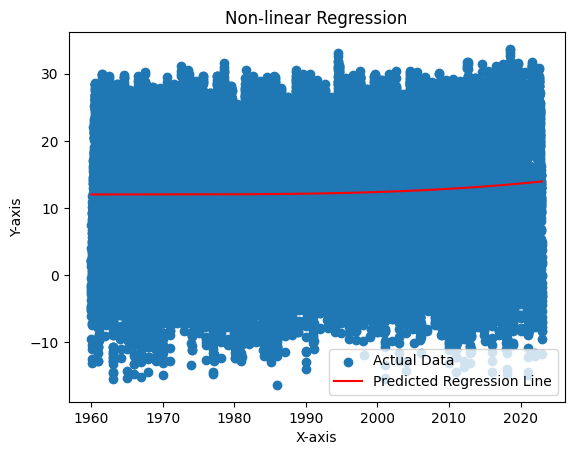

In [11]:
# 실제 데이터와 예측값 시각화
plt.scatter(x, y, label='Actual Data')  # 실제 데이터
plt.plot(x, y_pred, color='red', label='Predicted Regression Line')  # 예측값

plt.title('Non-linear Regression')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

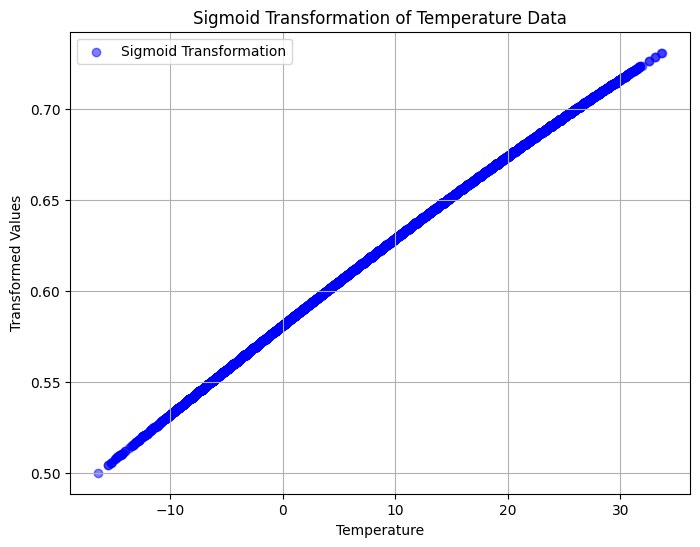

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 기존 데이터프레임에서 평균기온 컬럼 사용
temperature_data = df1['평균기온']

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 평균기온 데이터를 정규화하여 시그모이드 함수에 적용
normalized_temperature = (temperature_data - temperature_data.min()) / (temperature_data.max() - temperature_data.min())
sigmoid_values = sigmoid(normalized_temperature)

# 그래프로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(temperature_data, sigmoid_values, label='Sigmoid Transformation', color='blue', alpha=0.5)
plt.title('Sigmoid Transformation of Temperature Data')
plt.xlabel('Temperature')
plt.ylabel('Transformed Values')
plt.legend()
plt.grid(True)
plt.show()


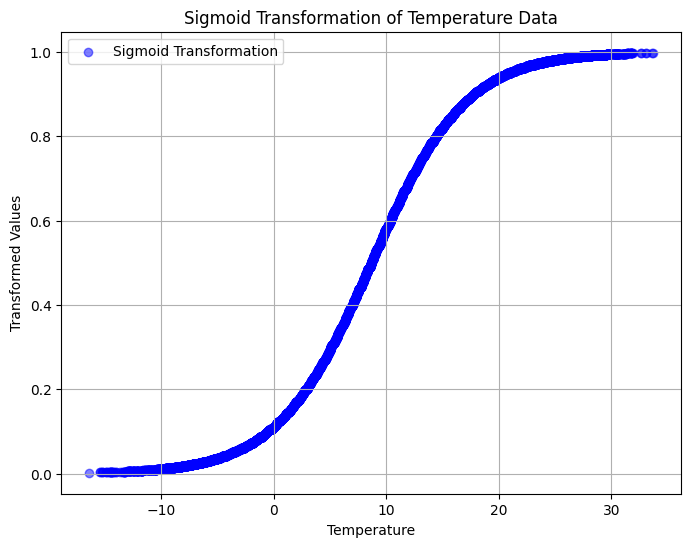

In [13]:
# 기존 데이터프레임에서 평균기온 컬럼 사용
temperature_data = df1['평균기온']

# 데이터를 0과 1 사이로 조정
min_temp = temperature_data.min()
max_temp = temperature_data.max()
normalized_temperature = (temperature_data - min_temp) / (max_temp - min_temp)

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수에 적용
sigmoid_values = sigmoid(normalized_temperature * 12 - 6)  # 예시로 범위를 -6에서 6으로 맞춤

# 그래프로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(temperature_data, sigmoid_values, label='Sigmoid Transformation', color='blue', alpha=0.5)
plt.title('Sigmoid Transformation of Temperature Data')
plt.xlabel('Temperature')
plt.ylabel('Transformed Values')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

# 데이터를 사용하여 도함수를 계산
sigmoid_derivative_values = sigmoid_derivative(normalized_temperature * 12 - 6)
sigmoid_derivative_values

일시
1960-01-01    0.072816
1960-01-02    0.068516
1960-01-03    0.186076
1960-01-04    0.245317
1960-01-05    0.038556
                ...   
2022-12-27    0.059286
2022-12-28    0.051129
2022-12-29    0.055663
2022-12-30    0.069926
2022-12-31    0.078878
Name: 평균기온, Length: 23011, dtype: float64

In [15]:
df1

평균기온
일시              
1960-01-01  -1.6
1960-01-02  -1.9
1960-01-03   4.0
1960-01-04   7.5
1960-01-05  -4.6
...          ...
2022-12-27  -2.6
2022-12-28  -3.3
2022-12-29  -2.9
2022-12-30  -1.8
2022-12-31  -1.2

[23011 rows x 1 columns]

In [16]:
# df1과 sigmoid_derivative_values의 일치하는 행별로 값을 더하여 새로운 열로 추가
df1['sigmoid'] = df1['평균기온'] + sigmoid_derivative_values.values.flatten()

# 결과 확인
print(df1['sigmoid'])


일시
1960-01-01   -1.527184
1960-01-02   -1.831484
1960-01-03    4.186076
1960-01-04    7.745317
1960-01-05   -4.561444
                ...   
2022-12-27   -2.540714
2022-12-28   -3.248871
2022-12-29   -2.844337
2022-12-30   -1.730074
2022-12-31   -1.121122
Name: sigmoid, Length: 23011, dtype: float64


In [17]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df1.index = pd.to_datetime(df1.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
df1 = df1[df1.index.isin(date_range)]

# 추출된 데이터 확인
df1

평균기온    sigmoid
일시                         
1960-01-03   4.0   4.186076
1960-01-10   2.2   2.344909
1960-01-17  -5.3  -5.266988
1960-01-24 -12.5 -12.493770
1960-01-31   2.6   2.753987
...          ...        ...
2022-11-27   5.4   5.615647
2022-12-04  -3.5  -3.451015
2022-12-11   1.6   1.731634
2022-12-18  -9.5  -9.487387
2022-12-25  -5.4  -5.367717

[3287 rows x 2 columns]

In [18]:
df1.drop(columns='평균기온', inplace=True)
df1

C:\Users\navyb\AppData\Local\Temp\ipykernel_10132\3960626605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='평균기온', inplace=True)


sigmoid
일시                   
1960-01-03   4.186076
1960-01-10   2.344909
1960-01-17  -5.266988
1960-01-24 -12.493770
1960-01-31   2.753987
...               ...
2022-11-27   5.615647
2022-12-04  -3.451015
2022-12-11   1.731634
2022-12-18  -9.487387
2022-12-25  -5.367717

[3287 rows x 1 columns]

In [19]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df1['sigmoid'].values, order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f'SARIMA : {param}, {param_seasonal} >> AIC : {round(results.aic, 2)}')
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 52) >> AIC : 27670.74
SARIMA : (0, 0, 0), (0, 0, 1, 52) >> AIC : 24329.85
SARIMA : (0, 0, 0), (0, 1, 0, 52) >> AIC : 18817.71
SARIMA : (0, 0, 0), (0, 1, 1, 52) >> AIC : 17020.75
SARIMA : (0, 0, 0), (1, 0, 0, 52) >> AIC : 18779.5
SARIMA : (0, 0, 0), (1, 0, 1, 52) >> AIC : 17321.92
SARIMA : (0, 0, 0), (1, 1, 0, 52) >> AIC : 17636.84
SARIMA : (0, 0, 0), (1, 1, 1, 52) >> AIC : 17025.71
SARIMA : (0, 0, 1), (0, 0, 0, 52) >> AIC : 24601.07
SARIMA : (0, 0, 1), (0, 0, 1, 52) >> AIC : 22509.14
SARIMA : (0, 0, 1), (0, 1, 0, 52) >> AIC : 18795.08
SARIMA : (0, 0, 1), (0, 1, 1, 52) >> AIC : 16965.23
SARIMA : (0, 0, 1), (1, 0, 0, 52) >> AIC : 18751.87
SARIMA : (0, 0, 1), (1, 0, 1, 52) >> AIC : 17265.71
SARIMA : (0, 0, 1), (1, 1, 0, 52) >> AIC : 17620.15
SARIMA : (0, 0, 1), (1, 1, 1, 52) >> AIC : 16973.05
SARIMA : (0, 1, 0), (0, 0, 0, 52) >> AIC : 19178.85
SARIMA : (0, 1, 0), (0, 0, 1, 52) >> AIC : 18817.3
SARIMA : (0, 1, 0), (0, 1, 0, 52) >> AIC : 20783.2
SARIMA : (0, 1,

In [20]:
# optimal parameter
optim = [(param_list[param], param_seasonal) for param, param_seasonal in enumerate(results_AIC_list) if param_seasonal == min(results_AIC_list)]
print(optim)

[((1, 0, 1), 16878.02926547848)]


In [22]:
# SARIMAX 모델 생성
order = optim[0][0]  # SARIMA의 order 파라미터
seasonal_order = (0, 1, 1, 52) 

model = SARIMAX(df1['sigmoid'].values, order=order, seasonal_order=seasonal_order, enforce_stationarity = False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3287
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 52)   Log Likelihood               -8435.243
Date:                            Sat, 30 Dec 2023   AIC                          16878.486
Time:                                    22:34:15   BIC                          16902.746
Sample:                                         0   HQIC                         16887.186
                                           - 3287                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8488      0.026     32.685      0.000       0.798       0.900
ma.L1         -0.7175      0.034    -21.200      0.000      -0.784      -0.651
ma.S.L52      -0.8176      0.011    -76.587      0.000      -0.839      -0.797
sigma2        11.6571      0.244     47.853      0.000      11.180      12.135
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               170.50
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.26
Prob(H) (two-sided):                  0.71   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성합니다.
start_date = '2023-01-01'
end_date = '2023-12-24'
forecast_range = pd.date_range(start=start_date, end=end_date)

# SARIMAX 모델을 사용하여 2023년의 평균 기온을 예측합니다.
forecast = model_fit.get_forecast(steps=len(forecast_range))
forecast_values = forecast.predicted_mean

# 예측된 값을 데이터프레임으로 변환
forecast_df = pd.DataFrame({'일시': forecast_range, '평균기온': forecast_values})
print(forecast_df)

            일시       평균기온
0   2023-01-01  -2.213110
1   2023-01-02  -2.372849
2   2023-01-03  -3.358035
3   2023-01-04   1.015086
4   2023-01-05  -1.455278
..         ...        ...
353 2023-12-20  13.536124
354 2023-12-21  11.398698
355 2023-12-22  12.201916
356 2023-12-23   9.767923
357 2023-12-24   8.330523

[358 rows x 2 columns]


In [24]:
forecast_df.to_csv('sub_8.csv', index=False)

# Random Forest 시도

In [4]:
# 데이터프레임에서 인덱스를 포함한 '일시' 열을 날짜 형식으로 변환 (이미 날짜 형식이 아닌 경우)
df1.index = pd.to_datetime(df1.index)

# 시작 날짜와 끝 날짜 지정
start_date = '1960-01-03'
end_date = '2022-12-31'  # 2022년 12월 31일까지

# 시작 날짜와 끝 날짜를 포함하는 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')  # 7일씩 증가하는 날짜 범위

# 인덱스(일시)가 주어진 범위에 속하는 행들을 추출
df1 = df1[df1.index.isin(date_range)]

# 추출된 데이터 확인
df1

평균기온
일시              
1960-01-03   4.0
1960-01-10   2.2
1960-01-17  -5.3
1960-01-24 -12.5
1960-01-31   2.6
...          ...
2022-11-27   5.4
2022-12-04  -3.5
2022-12-11   1.6
2022-12-18  -9.5
2022-12-25  -5.4

[3287 rows x 1 columns]

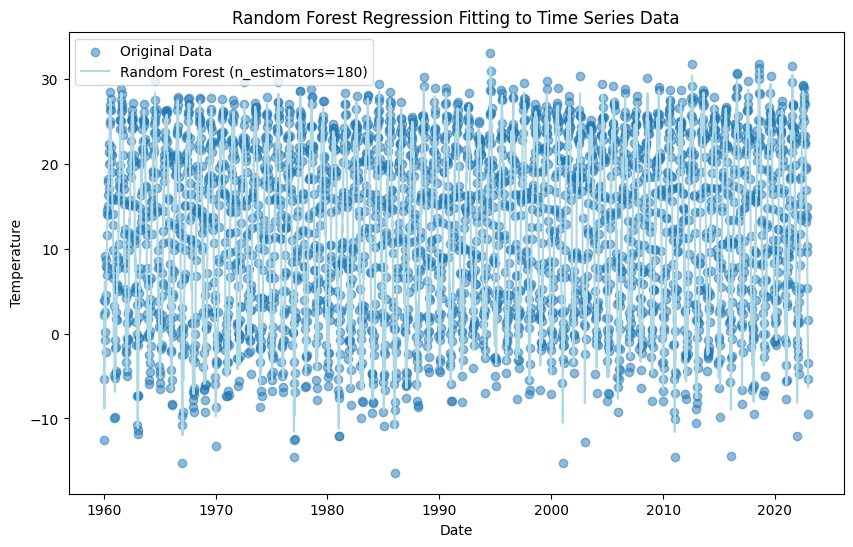

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df1' is your DataFrame with 'temperature' column and a datetime index

# Extracting features and target
X = np.arange(len(df1)).reshape(-1, 1)  # Sequence as features
y = df1['평균기온']

# Fitting a Random Forest regressor
n_estimators = 180  # Number of trees in the forest (can be adjusted)
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X, y)

# Predicting
y_pred = model.predict(X)

# Plotting the original data and the Random Forest predictions
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, y, label='Original Data', alpha=0.5)
plt.plot(df1.index, y_pred, color='lightblue', label=f'Random Forest (n_estimators={n_estimators})')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Random Forest Regression Fitting to Time Series Data')
plt.legend()
plt.show()

In [6]:
import pandas as pd

# Generate date range from 2023-01-01 to 2023-12-24
new_dates = pd.date_range(start='2023-01-01', end='2023-12-24', freq='D')
X_new = np.arange(len(df1), len(df1) + len(new_dates)).reshape(-1, 1)

# Use the model to predict temperatures for the new dates
y_pred_new = model.predict(X_new)
y_pred_new

array([-5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41611111,
       -5.41611111, -5.41611111, -5.41611111, -5.41611111, -5.41

In [7]:
# 이것도 실패...ㅠㅠ

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df1' is your DataFrame with 'temperature' column and a datetime index

# Extracting features and target
X = np.arange(len(df)).reshape(-1, 1)  # Sequence as features
y = df['평균기온']

# Fitting a Random Forest regressor
n_estimators = 180  # Number of trees in the forest (can be adjusted)
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X, y)

# Predicting
y_pred = model.predict(X)

# # Plotting the original data and the Random Forest predictions
# plt.figure(figsize=(10, 6))
# plt.scatter(df['일시'], y, label='Original Data', alpha=0.5)
# plt.plot(df['일시'], y_pred, color='lightblue', label=f'Random Forest (n_estimators={n_estimators})')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.title('Random Forest Regression Fitting to Time Series Data')
# plt.legend()
# plt.show()

In [5]:
import pandas as pd

# Generate date range from 2023-01-01 to 2023-12-24
new_dates = pd.date_range(start='2023-01-01', end='2023-12-24', freq='D')
X_new = np.arange(len(df), len(df) + len(new_dates)).reshape(-1, 1)

# Use the model to predict temperatures for the new dates
y_pred_new = model.predict(X_new)
y_pred_new

array([-1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55611111,
       -1.55611111, -1.55611111, -1.55611111, -1.55611111, -1.55

In [6]:
# 이것도 실패...